<a href="https://colab.research.google.com/github/liballouo/Mahjong/blob/main/Pong_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [2]:
torch.cuda.is_available()

True

# Mount Google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataloader

In [4]:
class ExampleDataset(Dataset):
    def __init__(self):
        # integer inputs
        # file_name = '/content/drive/MyDrive/專題/Pong_reward_hand_only_0_1.csv'
        # float inputs
        # file_name = '/content/drive/MyDrive/專題/Pong_reward_hand_only.csv'
        file_name = '/content/drive/MyDrive/專題/Pong_reward_extended_hand_only.csv'
        df = pd.read_csv(file_name)

        xy = df.to_numpy()

        for i in range(len(xy)):
            for j in range(len(xy[i])):
                xy[i][j] = np.array(eval(xy[i][j]))

        x = xy[:, :-1]
        y = xy[:, -1:]

        test_tensor = []
        test_tensor.append(torch.tensor([list(arr) for arr in x]))

        flatten_tensor = torch.tensor([list(arr) for arr in x])

        # for i in range(len(test_tensor)):
        #     torch.flatten(flatten_tensor[i])

        tensor_y = torch.tensor([list(arr) for arr in y])

        x = flatten_tensor

        # Reshape input x to have dimensions (batch_size, 2, 34)
        # print(x.shape)
        x = x.reshape(-1, 2, 34)
        # print(x.shape)

        # float inputs
        self.x = torch.tensor(x, dtype=torch.float32)
        # integer inputs
        # self.x = torch.tensor(x, dtype=torch.int32)

        self.y = tensor_y
        self.y = tensor_y.squeeze(1)  # Reshape label tensor to remove the extra dimension

        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples


In [5]:
dataset = ExampleDataset()

batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# print(len(dataset))

<ipython-input-4-b11d50cbe5fa>:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  test_tensor.append(torch.tensor([list(arr) for arr in x]))
<ipython-input-4-b11d50cbe5fa>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x, dtype=torch.float32)


In [6]:
print(len(dataset.x))

100000


# Split data

In [7]:
# Random split
# length of training set
training_set_size = int(len(dataset) * 0.8)
# length of test set
test_set_size = len(dataset) - training_set_size
training_set, test_set = random_split(dataset, [training_set_size, test_set_size])

training_dataloader = DataLoader(training_set, batch_size=batch_size, shuffle=True, pin_memory=True)
test_dataloader = DataLoader(test_set, batch_size=batch_size, shuffle=True, pin_memory=True)

print(len(training_dataloader))
print(len(test_dataloader))

2500
625


# Dataset for sampling (skip)

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset from CSV using pandas
file_name = '/content/drive/MyDrive/專題/Pong_reward_hand_only_0_1_only.csv'
df = pd.read_csv(file_name)

# Step 2: Separate features (X) and labels (y)
X = df.drop(columns=['probability'])  # Replace 'target_column_name' with the name of your target column
y = df['probability']  # Replace 'target_column_name' with the name of your target column

X = X.to_numpy()
y = y.to_numpy()

for i in range(len(X)):
  for j in range(len(X[i])):
    X[i][j] = np.array(eval(X[i][j]))


print(type(X[0]))
print(y[0])

# Step 3: Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now you have the balanced dataset in X_resampled and y_resampled, and you can use them for training your model


<class 'numpy.ndarray'>
1


ValueError: ignored

In [ ]:
class SampleDataset(Dataset):
    def __init__(self):
        # integer inputs
        file_name = '/content/drive/MyDrive/專題/Pong_reward_hand_only_0_1.csv'
        # float inputs
        # file_name = '/content/drive/MyDrive/專題/Pong_reward_hand_only.csv'
        df = pd.read_csv(file_name)

        xy = df.to_numpy()

        for i in range(len(xy)):
            for j in range(len(xy[i])):
                xy[i][j] = np.array(eval(xy[i][j]))

        self.x = xy[:, :-1]
        self.y = xy[:, -1:]


# Sampling adjustment (skip)


In [ ]:
dataset = SampleDataset()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.x, dataset.y, test_size=0.3,random_state=11)

In [ ]:
print('Training set length: ' + str(len(X_train)))
print('Test set length: ' + str(len(X_test)))

count_1 = 0

for row in y_train:
  if row.item(0)[1] == 1:
    count_1 += 1
print('Choose Pong: ' + str(count_1))

Training set length: 19263
Test set length: 8256
Choose Pong: 18403


In [ ]:
num_samples = X_train.shape[0]
X_train_flattened = X_train.reshape(num_samples, -1)

num_samples = y_train.shape[0]
y_train_flattened = y_train.reshape(num_samples, -1)
print(type(y_train_flattened))
y_train_flattened = y_train_flattened.astype('int')

<class 'numpy.ndarray'>


ValueError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')  # You can adjust the sampling strategy if needed
x_train_resampled, y_train_resampled = smote.fit_resample(X_train_flattened, y_train_flattened)


ValueError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

ValueError: ignored

# Model

In [8]:
class Majhong_Model(nn.Module):
    def __init__(self):
        super(Majhong_Model, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=2, out_channels=256, kernel_size=3, stride=1, padding='same')
        self.conv2 = nn.Conv1d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding='same')
        self.conv_last = nn.Conv1d(in_channels=256, out_channels=32, kernel_size=3, stride=1)
        # self.fc = nn.Linear(32*34, 1024)
        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 2)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        batch_size = x.size(0)
        out = self.conv1(x)
        out = self.relu(out)
        for i in range(2):
          out = self.conv2(out)
          out = self.relu(out)

        out = self.conv_last(out)
        out = self.relu(out)
        out = out.view(batch_size, -1)  # Flatten the output of convolutional layer
        # out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out


In [10]:
model = Majhong_Model()
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Test

In [ ]:
def test(net, testLoader, criterion, show=False):
  net.eval()
  totalLoss = 0.0
  accuracy = 0.0
  count = 0
  for x, label in testLoader:
    x = x.to(device, dtype=torch.float32)
    label = label.to(device, dtype=torch.float32)
    output = net(x)
    loss = criterion(output, label)
    _, predicted = torch.max(output.data, dim=1)
    check_label = torch.Tensor()
    check_label = torch.argmax(label, dim=1)
    count += len(x)
    accuracy += (predicted == check_label).sum().item()
    totalLoss += loss.item()*len(label)
  if show == True:
    print("Test Loss: {}".format(totalLoss / count))
    print("Test Accuracy: {}".format(accuracy / count))
  return (totalLoss / count, accuracy / count)


# Test (confusion matrix)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def test(net, testLoader, criterion, show=False):
    net.eval()
    totalLoss = 0
    correct = 0
    count = 0
    all_predicted = []
    all_true = []

    for x, label in testLoader:
        x = x.to(device, dtype=torch.float32)
        label = label.to(device, dtype=torch.float32)
        output = net(x)
        print(output)
        loss = criterion(output, label)
        _, predicted = torch.max(output.data, 1)
        check_label = torch.Tensor()
        check_label = torch.argmax(label, dim=1)

        count += len(x)
        correct += (predicted == check_label).sum().item()
        totalLoss += loss.item() * len(label)

        all_predicted.extend(predicted.tolist())
        all_true.extend(check_label.tolist())

    # Compute the confusion matrix
    cm = confusion_matrix(all_true, all_predicted)

    # Calculate accuracy
    accuracy = correct / count

    if show == True:
      print("Test Loss: {:.4f}".format(totalLoss / count))
      print("Test Accuracy: {:.2f}%".format(accuracy * 100))

    # Create a heatmap using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    # Add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    # Display the chart
    plt.show()

    # Show accuracy, precision, recall, f1-score
    print('Accuracy :' + str(accuracy * 100) +'%')

    precision = precision_score(all_true, all_predicted)
    recall = recall_score(all_true, all_predicted)
    f1score = f1_score(all_true, all_predicted)

    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 Score = {f1score}")

    return (totalLoss / count, accuracy)



# Check best model

串流輸出內容已截斷至最後 5000 行。
        [0.0528, 0.9472],
        [0.1032, 0.8968],
        [0.1014, 0.8986],
        [0.0516, 0.9484],
        [0.0507, 0.9493],
        [0.1024, 0.8976],
        [0.0512, 0.9488],
        [0.0524, 0.9476]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[0.0541, 0.9459],
        [0.0531, 0.9469],
        [0.0515, 0.9485],
        [0.0502, 0.9498],
        [0.0526, 0.9474],
        [0.0527, 0.9473],
        [0.0527, 0.9473],
        [0.0522, 0.9478],
        [0.0535, 0.9465],
        [0.0513, 0.9487],
        [0.4457, 0.5543],
        [0.0495, 0.9505],
        [0.0502, 0.9498],
        [0.0499, 0.9501],
        [0.0493, 0.9507],
        [0.0526, 0.9474],
        [0.0521, 0.9479],
        [0.0539, 0.9461],
        [0.0515, 0.9485],
        [0.0533, 0.9467],
        [0.0522, 0.9478],
        [0.0406, 0.9594],
        [0.0516, 0.9484],
        [0.0512, 0.9488],
        [0.0503, 0.9497],
        [0.4021, 0.5979],
        [0.0510, 0.9490],
        [0.0481, 0.9519

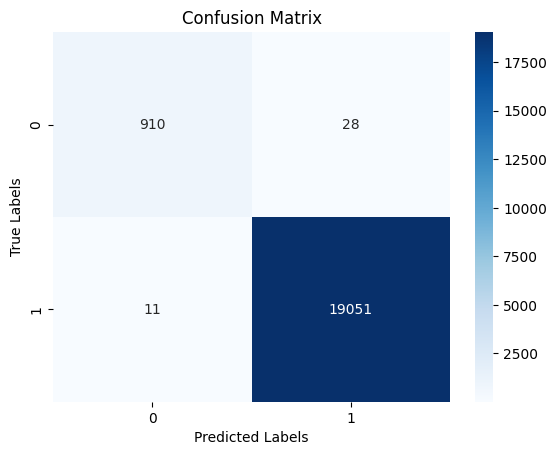

Accuracy :99.80499999999999%
Precision = 0.998532417841606
Recall = 0.9994229356835589
F1 Score = 0.998977478304187


In [11]:
best_model = torch.load('/content/drive/MyDrive/專題/Pong model/best_model.pth')

model = Majhong_Model()
model.load_state_dict(best_model['model_state_dict'])

model = model.to(device)
criterion = criterion.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.load_state_dict(best_model['optimizer_state_dict'])

model.eval()

_, best_accuracy = test(model, test_dataloader, criterion)

In [ ]:
print(best_accuracy)

0.95255


In [ ]:
model = Majhong_Model()
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training (save model)

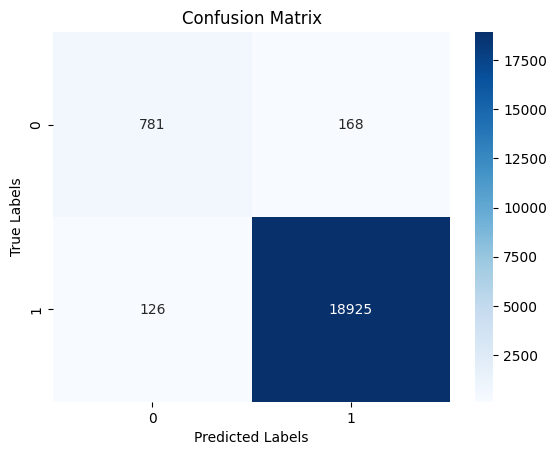

Accuracy :98.53%
Precision = 0.9912009637039753
Recall = 0.9933861739541231
F1 Score = 0.992292365771812
Epoch 1/150, Loss: 0.6195639371871948
Best model saved, epoch = 1.


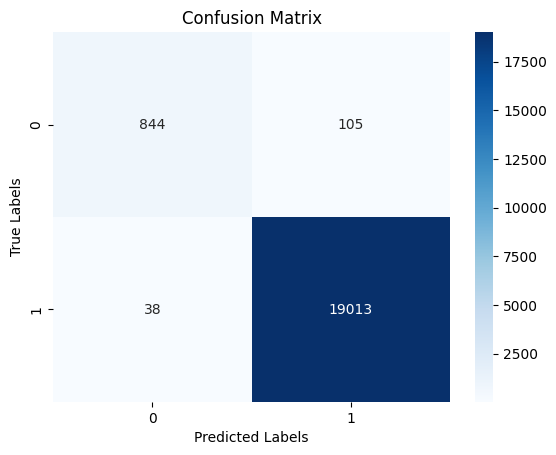

Accuracy :99.285%
Precision = 0.9945077937022702
Recall = 0.9980053540496562
F1 Score = 0.9962535041525845
Epoch 2/150, Loss: 0.6126400232315063
Best model saved, epoch = 2.


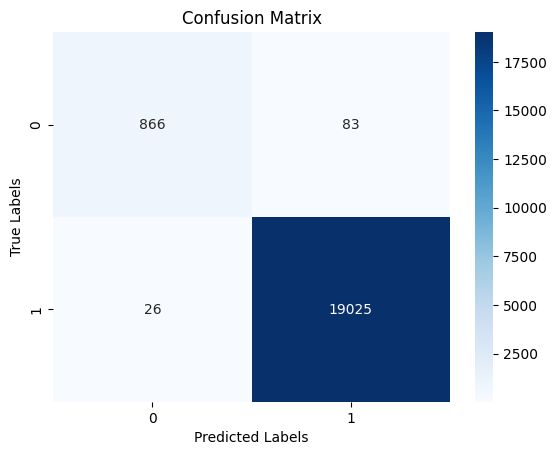

Accuracy :99.455%
Precision = 0.9956562696252879
Recall = 0.9986352422445016
F1 Score = 0.9971435310149637
Epoch 3/150, Loss: 0.6111831068992615
Best model saved, epoch = 3.


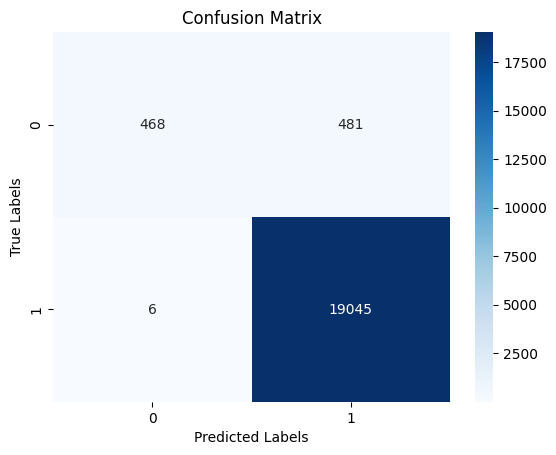

Accuracy :97.565%
Precision = 0.9753661784287616
Recall = 0.9996850559025773
F1 Score = 0.9873758975555382
Epoch 4/150, Loss: 0.6173743605613708


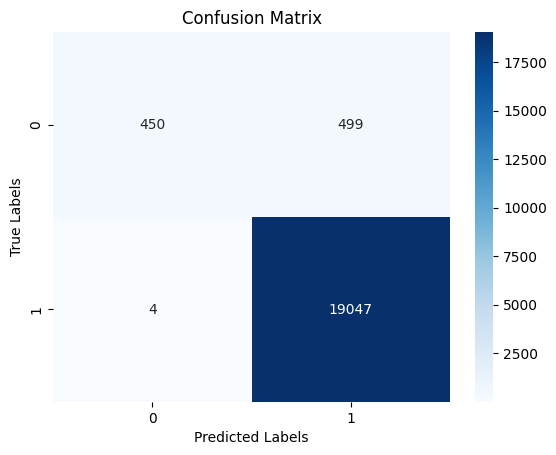

Accuracy :97.485%
Precision = 0.9744704798935844
Recall = 0.9997900372683849
F1 Score = 0.9869678990595124
Epoch 5/150, Loss: 0.6189355254173279


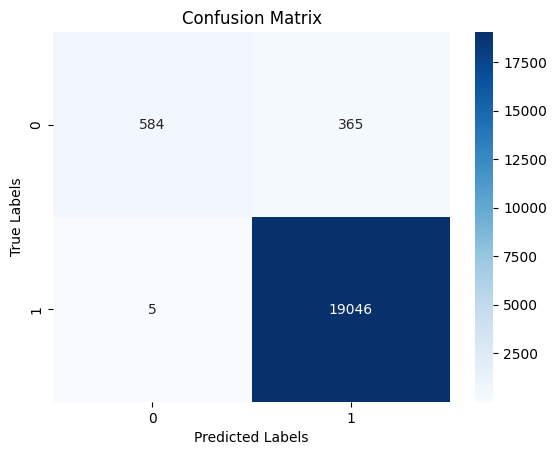

Accuracy :98.15%
Precision = 0.9811962289423523
Recall = 0.9997375465854811
F1 Score = 0.9903801154386147
Epoch 6/150, Loss: 0.619748592376709


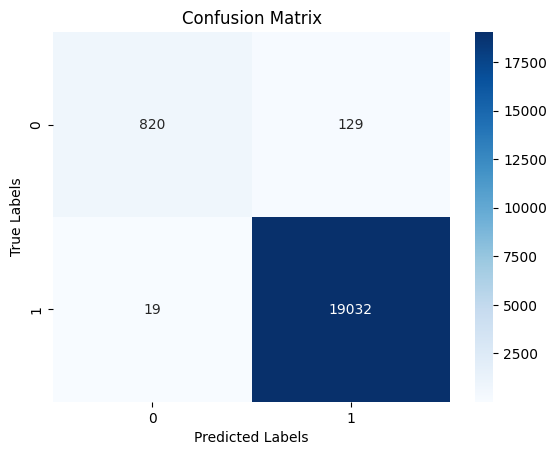

Accuracy :99.26%
Precision = 0.9932675747612337
Recall = 0.9990026770248281
F1 Score = 0.996126871139956
Epoch 7/150, Loss: 0.607040524482727


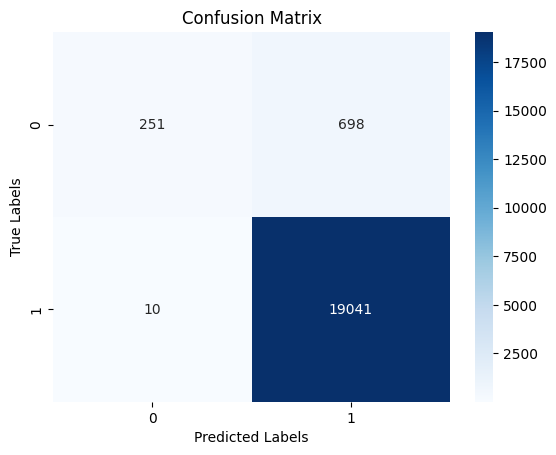

Accuracy :96.46000000000001%
Precision = 0.9646385328537413
Recall = 0.9994750931709622
F1 Score = 0.9817478731631865
Epoch 8/150, Loss: 0.6137893199920654


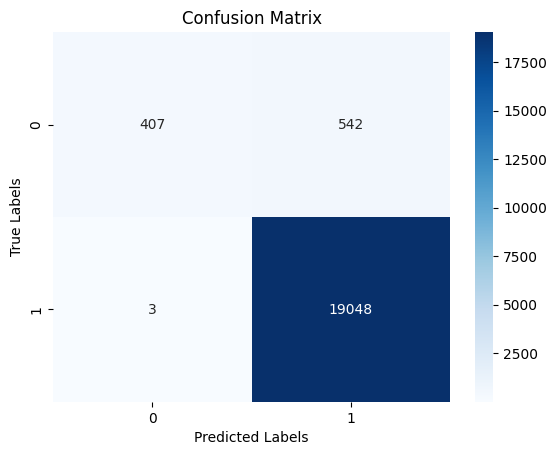

Accuracy :97.275%
Precision = 0.9723328228688106
Recall = 0.9998425279512887
F1 Score = 0.985895810149841
Epoch 9/150, Loss: 0.607100248336792


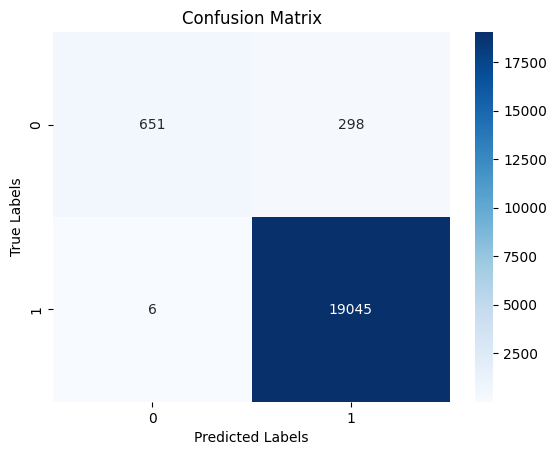

Accuracy :98.48%
Precision = 0.9845939099415809
Recall = 0.9996850559025773
F1 Score = 0.9920820961608585
Epoch 10/150, Loss: 0.6088067293167114


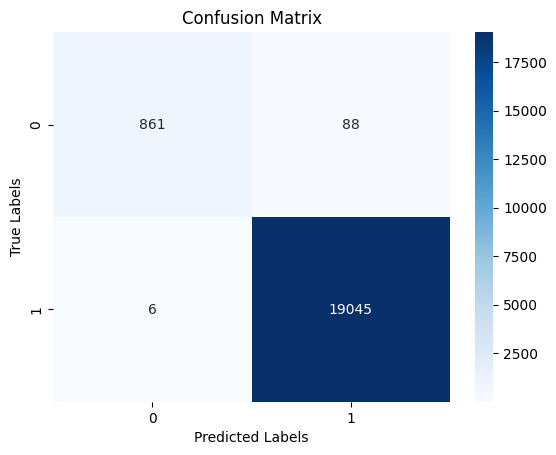

Accuracy :99.53%
Precision = 0.9954006167354832
Recall = 0.9996850559025773
F1 Score = 0.997538235910329
Epoch 11/150, Loss: 0.6031728982925415
Best model saved, epoch = 11.


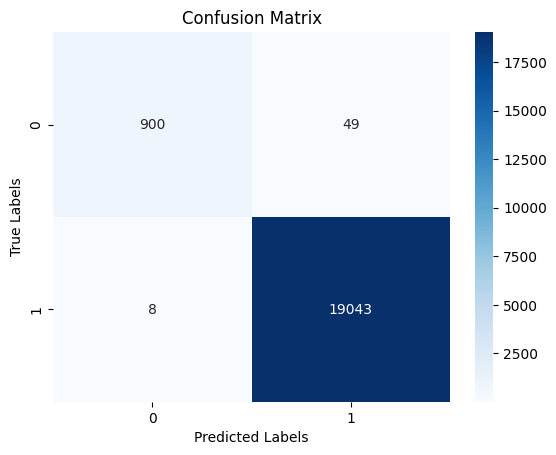

Accuracy :99.715%
Precision = 0.9974334799916196
Recall = 0.9995800745367697
F1 Score = 0.9985056235744435
Epoch 12/150, Loss: 0.6040160655975342
Best model saved, epoch = 12.


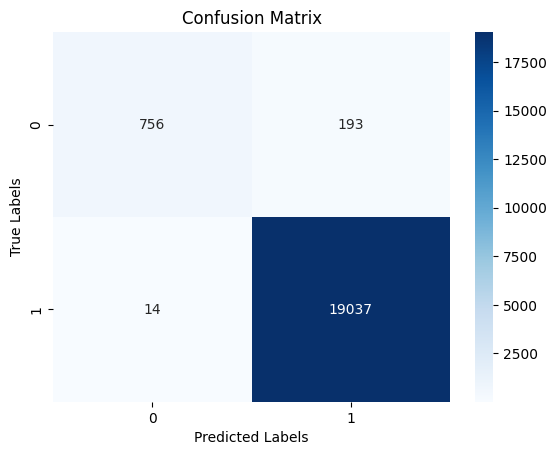

Accuracy :98.965%
Precision = 0.9899635985439418
Recall = 0.9992651304393471
F1 Score = 0.9945926177477078
Epoch 13/150, Loss: 0.6101275086402893


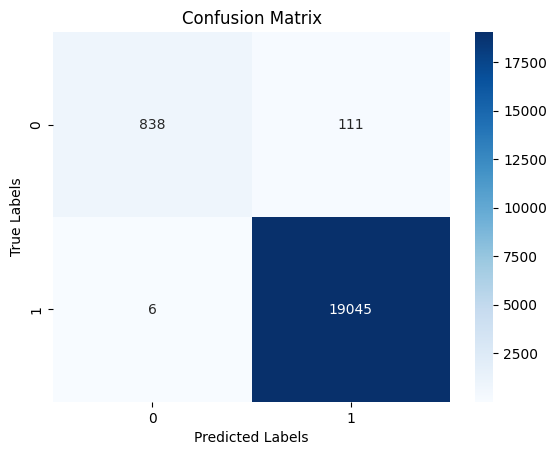

Accuracy :99.41499999999999%
Precision = 0.9942054708707455
Recall = 0.9996850559025773
F1 Score = 0.9969377339231031
Epoch 14/150, Loss: 0.6102845072746277


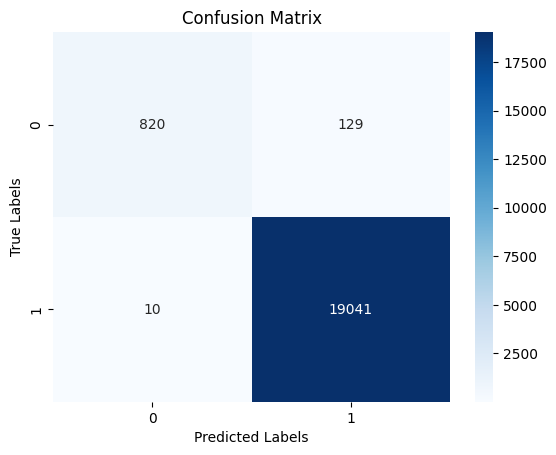

Accuracy :99.30499999999999%
Precision = 0.9932707355242566
Recall = 0.9994750931709622
F1 Score = 0.9963632558017843
Epoch 15/150, Loss: 0.6103649139404297


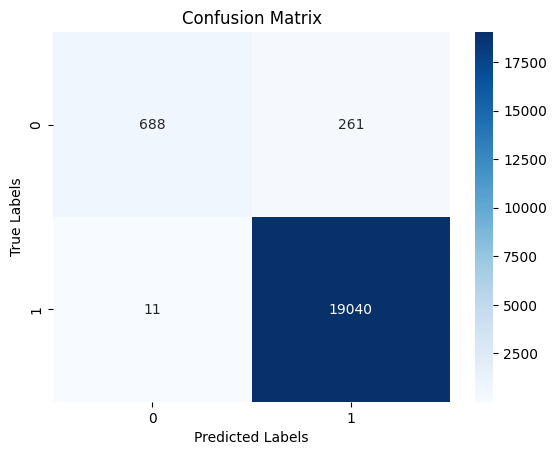

Accuracy :98.64%
Precision = 0.9864773845914719
Recall = 0.9994226024880584
F1 Score = 0.9929078014184397
Epoch 16/150, Loss: 0.619086503982544


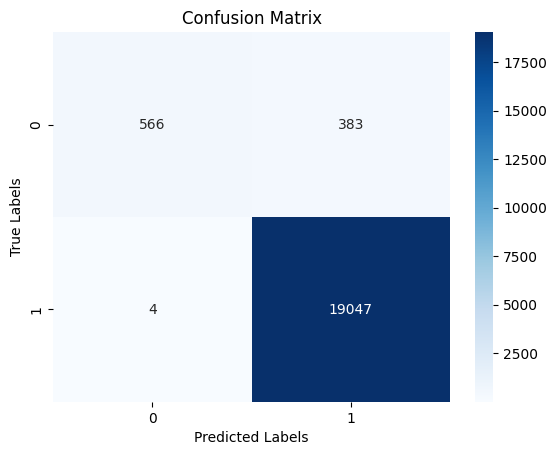

Accuracy :98.065%
Precision = 0.9802882141019043
Recall = 0.9997900372683849
F1 Score = 0.9899430887970686
Epoch 17/150, Loss: 0.613137423992157


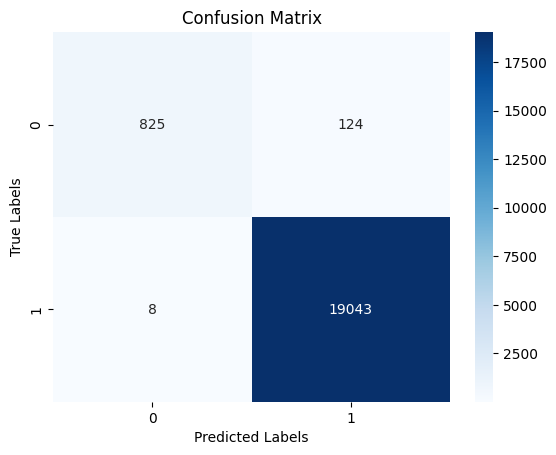

Accuracy :99.33999999999999%
Precision = 0.9935305472948297
Recall = 0.9995800745367697
F1 Score = 0.9965461300957664
Epoch 18/150, Loss: 0.610466718673706


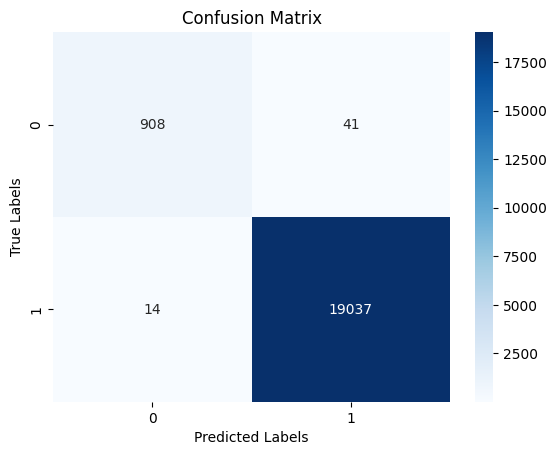

Accuracy :99.725%
Precision = 0.9978509277702066
Recall = 0.9992651304393471
F1 Score = 0.998557528390464
Epoch 19/150, Loss: 0.6102943420410156
Best model saved, epoch = 19.


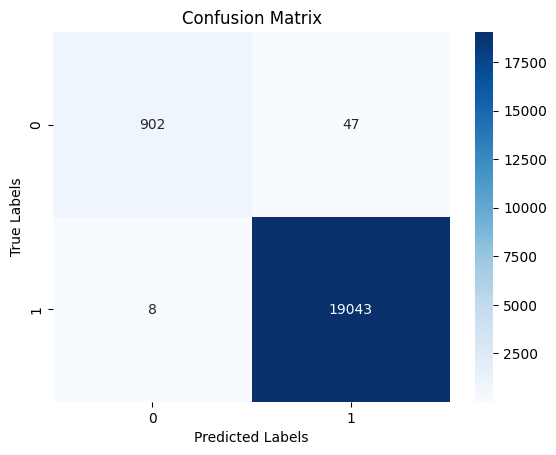

Accuracy :99.725%
Precision = 0.9975379779989524
Recall = 0.9995800745367697
F1 Score = 0.9985579822238536
Epoch 20/150, Loss: 0.6105924844741821


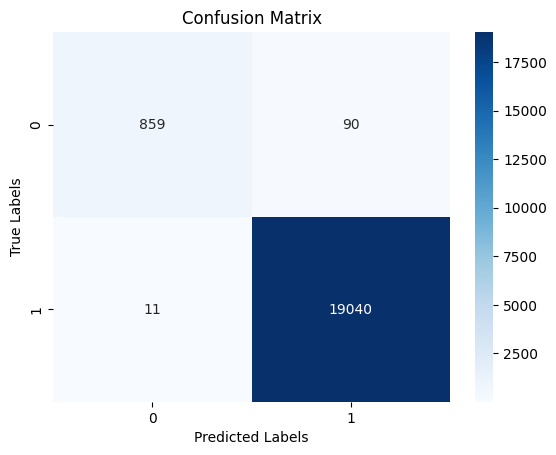

Accuracy :99.495%
Precision = 0.9952953476215368
Recall = 0.9994226024880584
F1 Score = 0.9973547052198738
Epoch 21/150, Loss: 0.6129761934280396


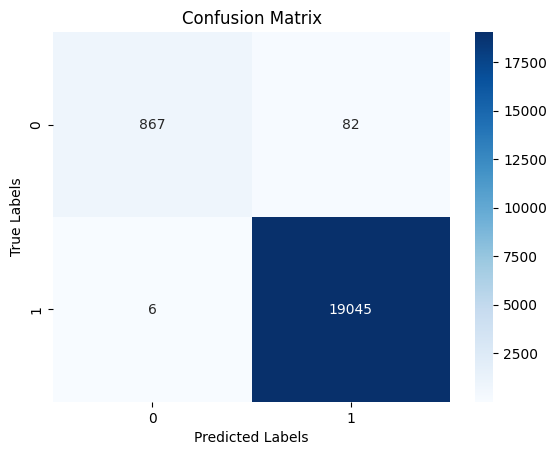

Accuracy :99.56%
Precision = 0.9957128666283265
Recall = 0.9996850559025773
F1 Score = 0.9976950075959977
Epoch 22/150, Loss: 0.6053115725517273


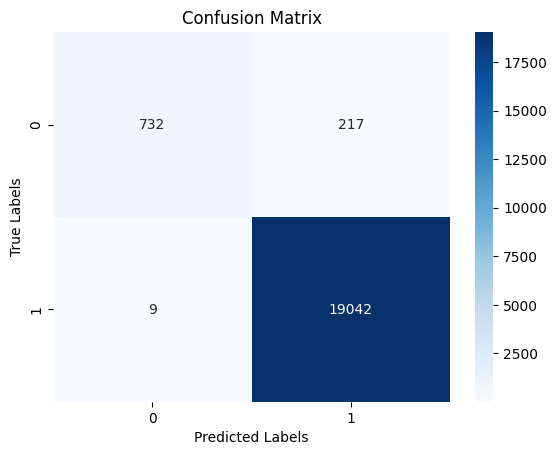

Accuracy :98.87%
Precision = 0.9887325406303547
Recall = 0.999527583853866
F1 Score = 0.9941007569825111
Epoch 23/150, Loss: 0.6047371625900269


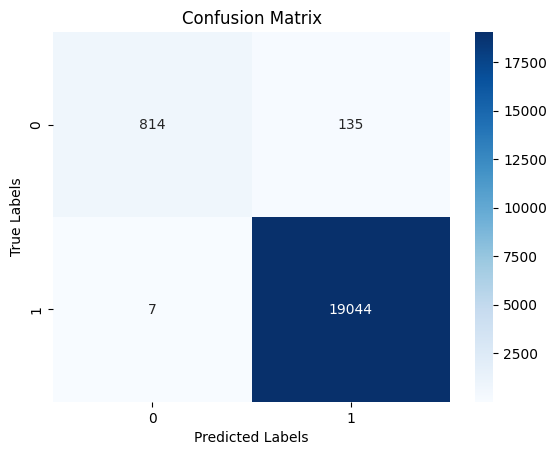

Accuracy :99.29%
Precision = 0.992961051149695
Recall = 0.9996325652196735
F1 Score = 0.9962856395500916
Epoch 24/150, Loss: 0.6103183031082153


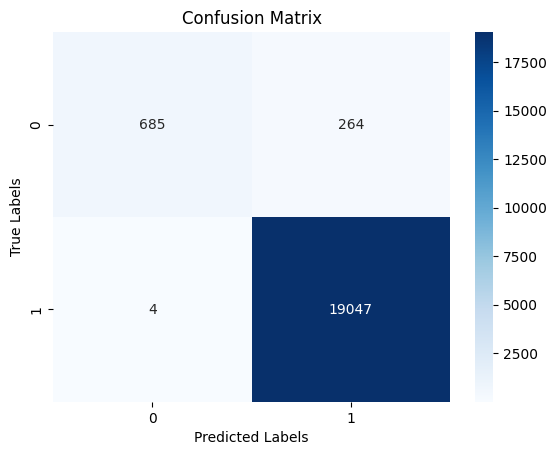

Accuracy :98.66%
Precision = 0.9863290352648749
Recall = 0.9997900372683849
F1 Score = 0.9930139200250249
Epoch 25/150, Loss: 0.6137838363647461


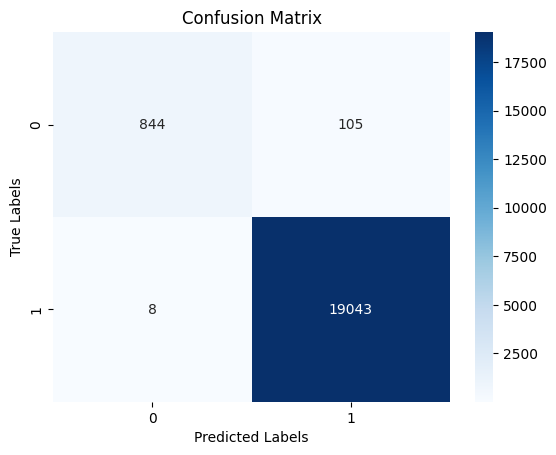

Accuracy :99.435%
Precision = 0.9945163985794861
Recall = 0.9995800745367697
F1 Score = 0.9970418073771565
Epoch 26/150, Loss: 0.6075707674026489


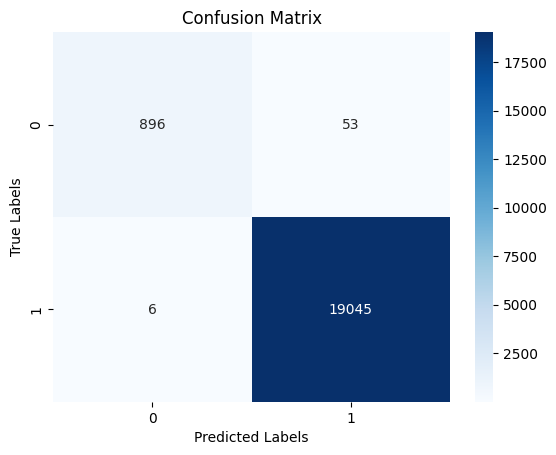

Accuracy :99.705%
Precision = 0.9972248402974133
Recall = 0.9996850559025773
F1 Score = 0.9984534325932527
Epoch 27/150, Loss: 0.61666339635849


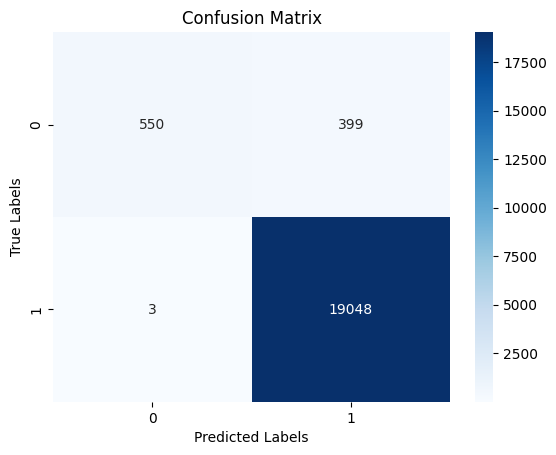

Accuracy :97.99%
Precision = 0.9794826965598807
Recall = 0.9998425279512887
F1 Score = 0.9895578991116423
Epoch 28/150, Loss: 0.6169357895851135


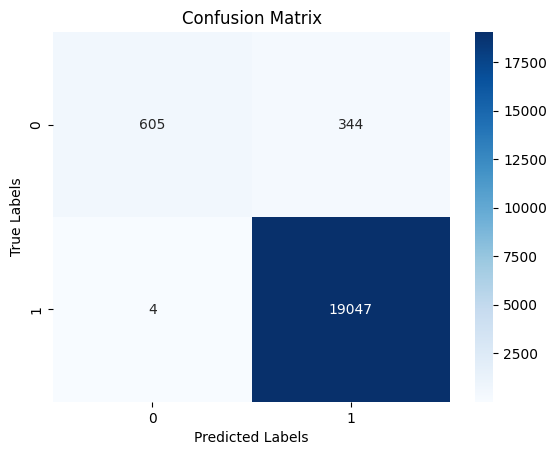

Accuracy :98.26%
Precision = 0.982259811252643
Recall = 0.9997900372683849
F1 Score = 0.9909474012798501
Epoch 29/150, Loss: 0.6123713254928589


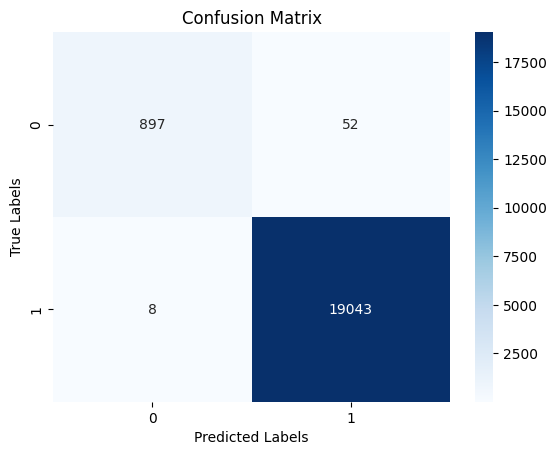

Accuracy :99.7%
Precision = 0.9972767740246138
Recall = 0.9995800745367697
F1 Score = 0.9984270958947201
Epoch 30/150, Loss: 0.6051362752914429


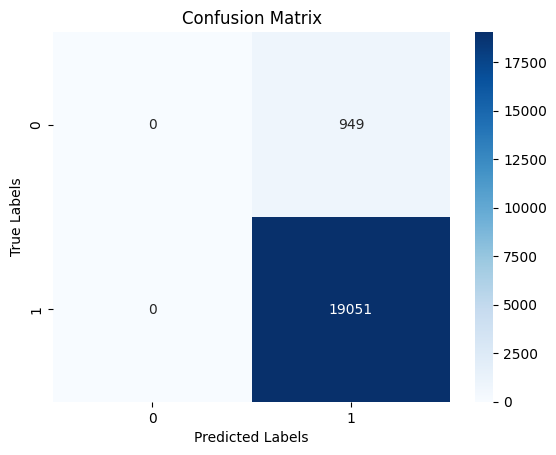

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 31/150, Loss: 0.6087783575057983


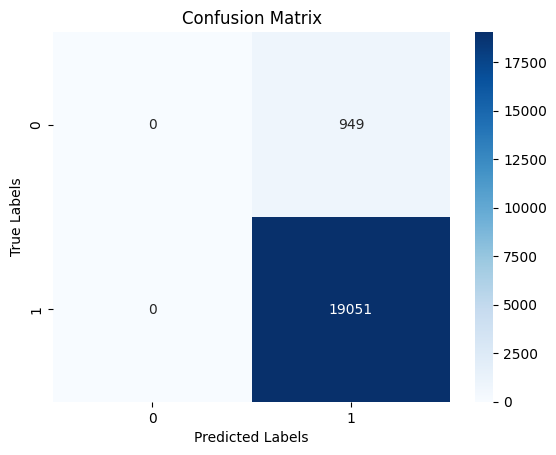

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 32/150, Loss: 0.6038426160812378


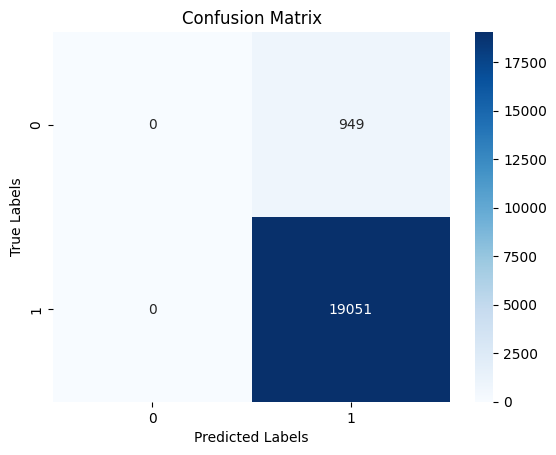

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 33/150, Loss: 0.619620680809021


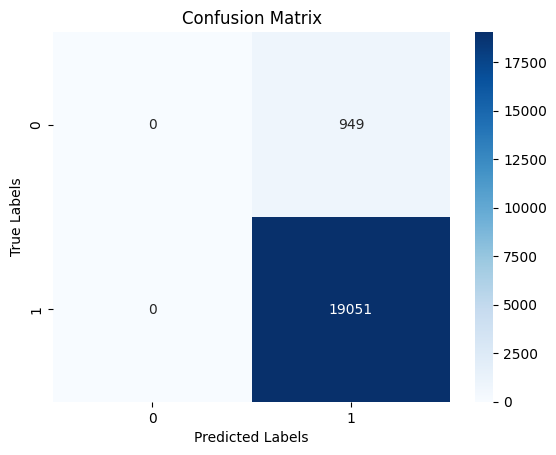

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 34/150, Loss: 0.6167670488357544


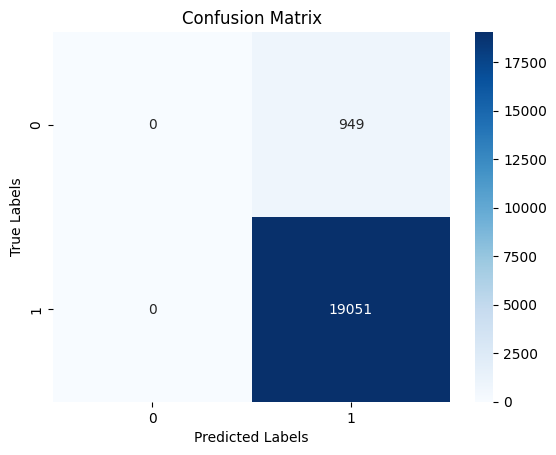

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 35/150, Loss: 0.6194334030151367


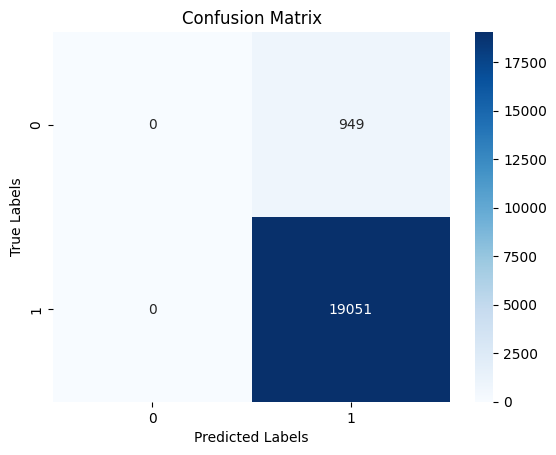

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 36/150, Loss: 0.6261283159255981


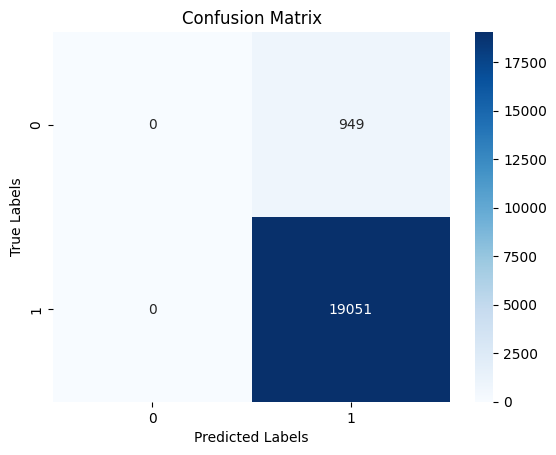

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 37/150, Loss: 0.6199744939804077


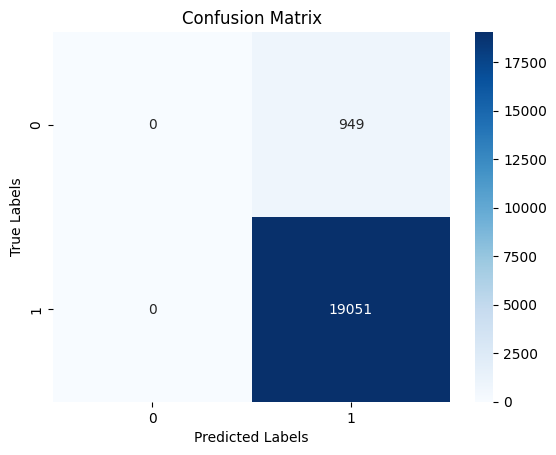

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 38/150, Loss: 0.6155679225921631


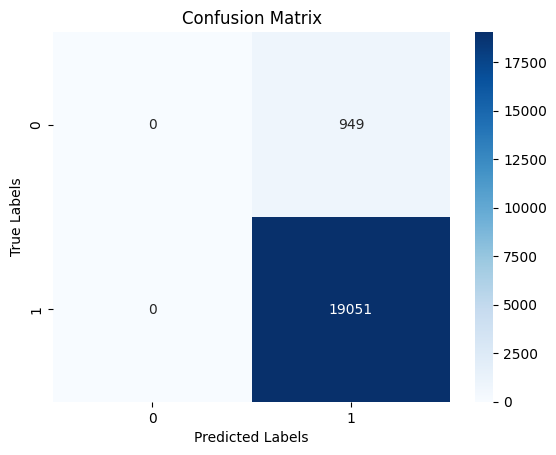

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 39/150, Loss: 0.6111689209938049


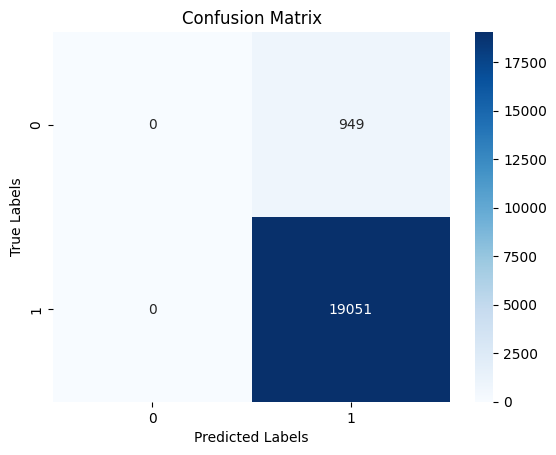

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 40/150, Loss: 0.6187710165977478


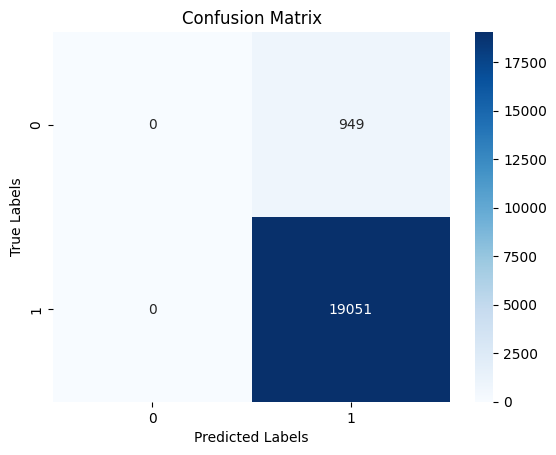

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 41/150, Loss: 0.6302492022514343


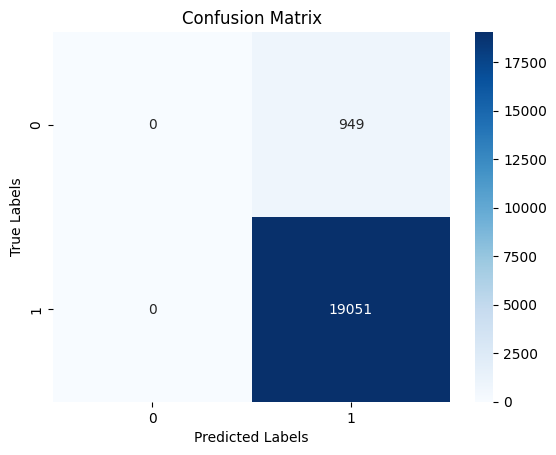

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 42/150, Loss: 0.6210402846336365


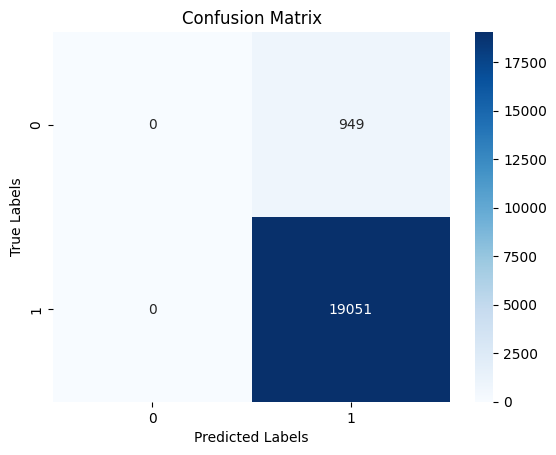

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 43/150, Loss: 0.6178327798843384


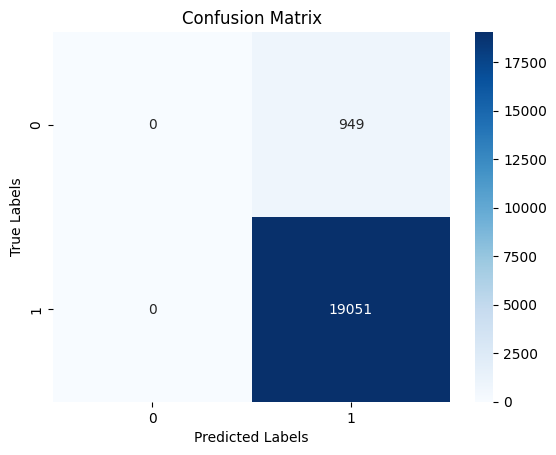

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 44/150, Loss: 0.6393643617630005


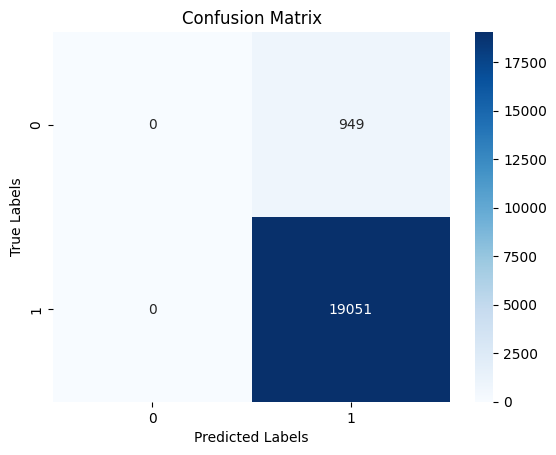

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 45/150, Loss: 0.6360958218574524


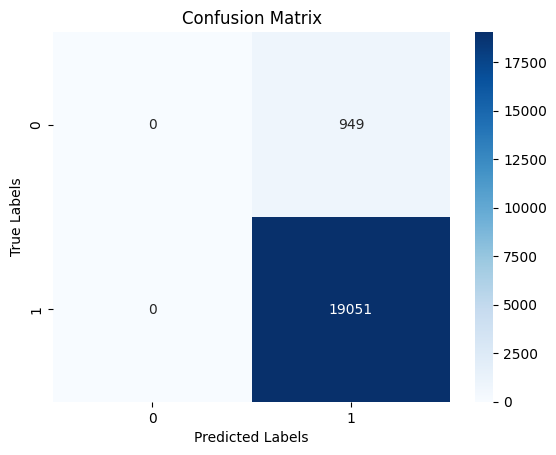

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 46/150, Loss: 0.6102244853973389


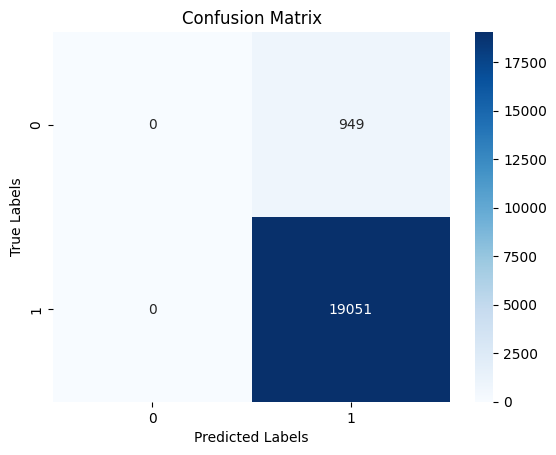

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 47/150, Loss: 0.615442156791687


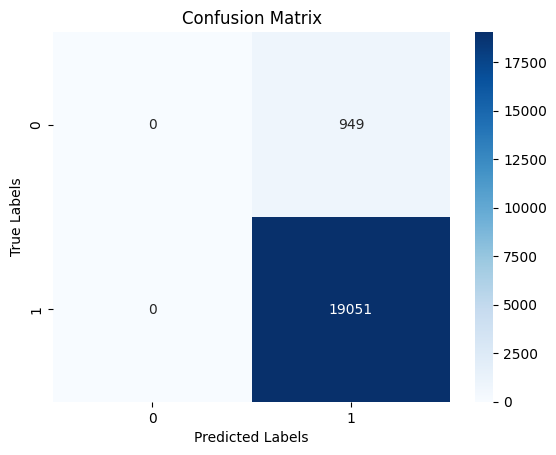

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 48/150, Loss: 0.6407498717308044


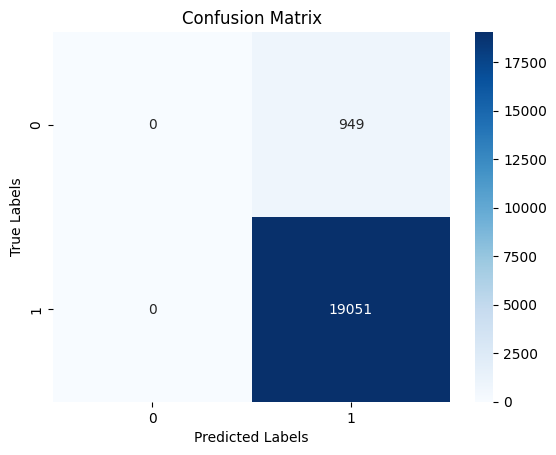

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 49/150, Loss: 0.6197154521942139


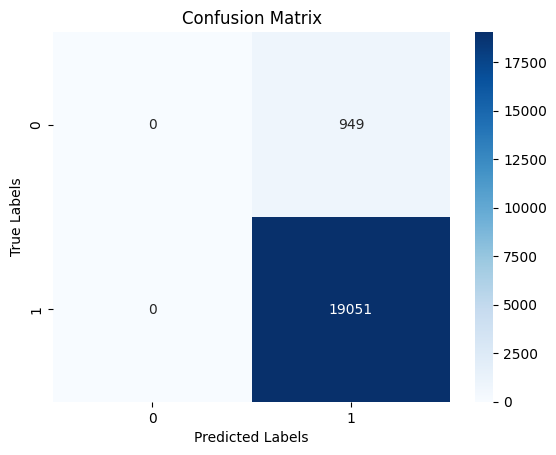

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 50/150, Loss: 0.6253135204315186


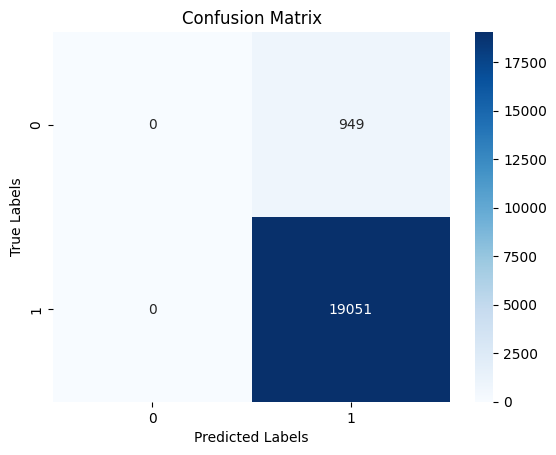

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 51/150, Loss: 0.6320987343788147


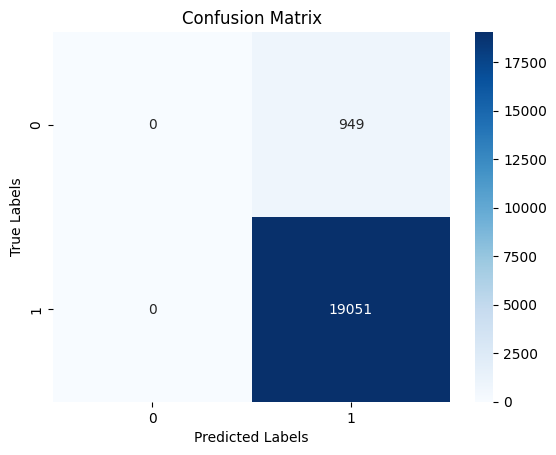

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 52/150, Loss: 0.6182160377502441


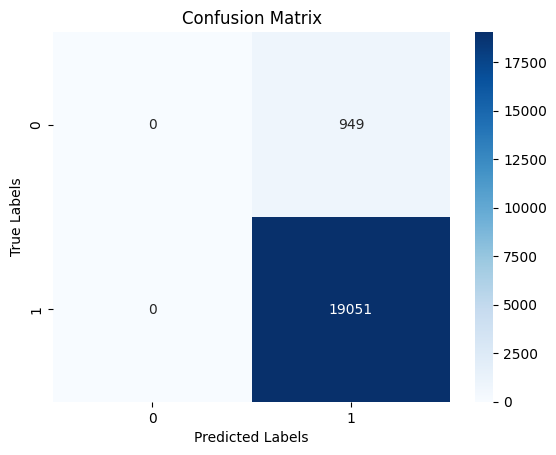

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 53/150, Loss: 0.6179585456848145


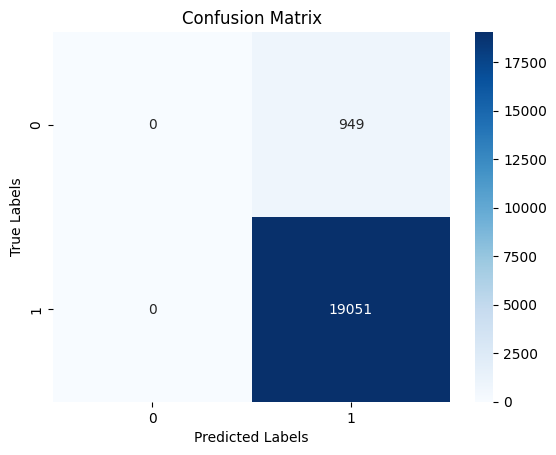

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 54/150, Loss: 0.6239370703697205


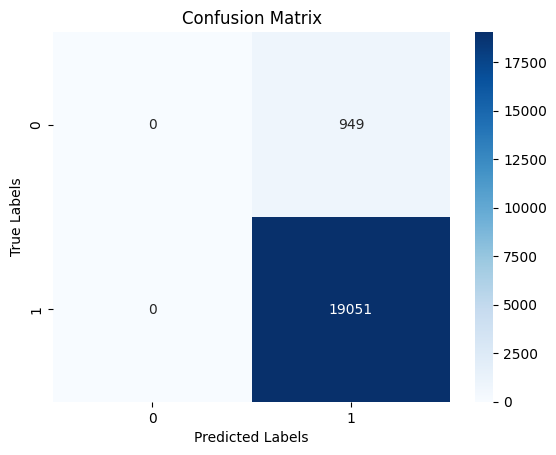

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 55/150, Loss: 0.622982382774353


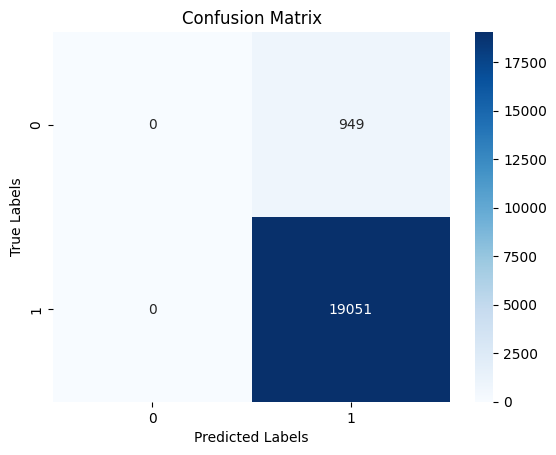

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 56/150, Loss: 0.6415327191352844


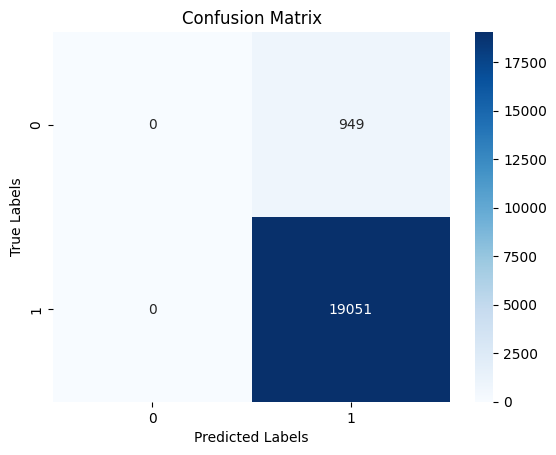

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 57/150, Loss: 0.6147797107696533


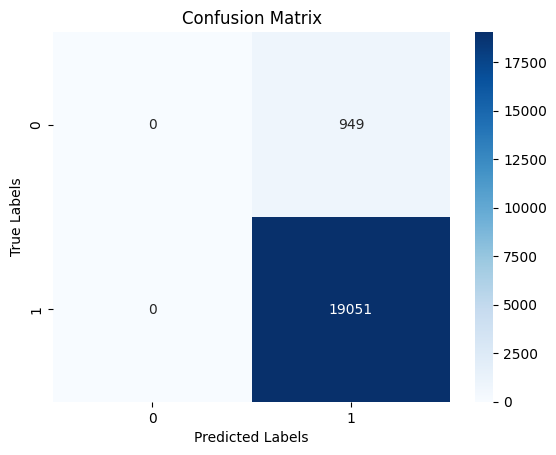

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 58/150, Loss: 0.6249101758003235


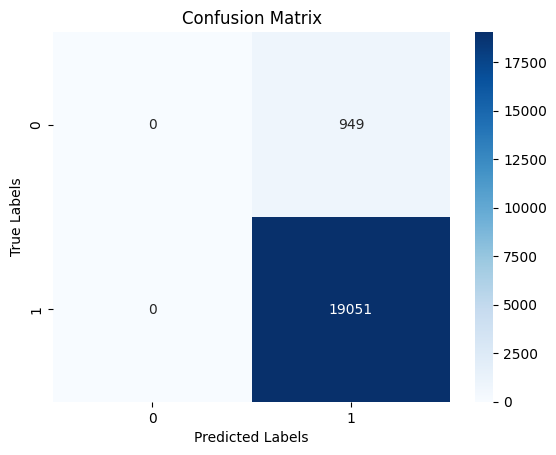

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 59/150, Loss: 0.6246510744094849


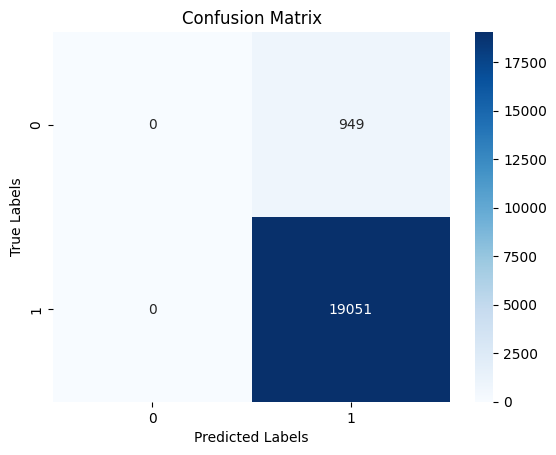

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 60/150, Loss: 0.6319774389266968


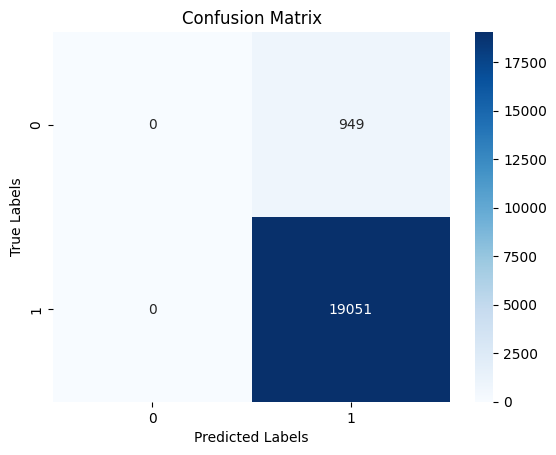

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 61/150, Loss: 0.6199744939804077


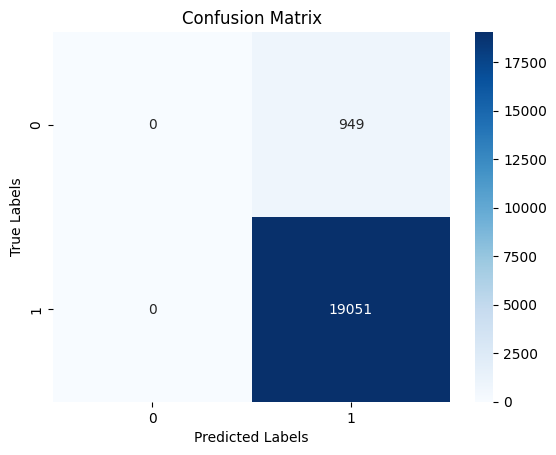

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 62/150, Loss: 0.6194334030151367


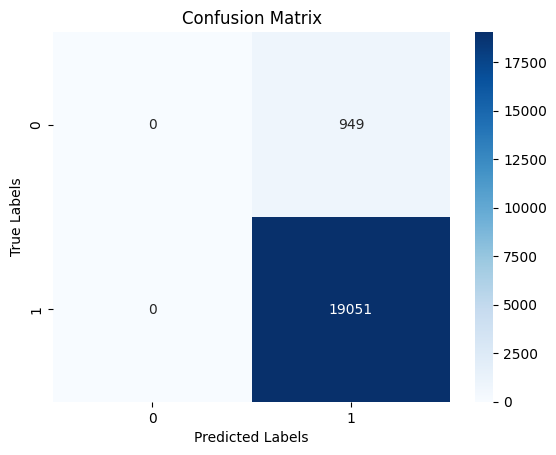

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 63/150, Loss: 0.6164849996566772


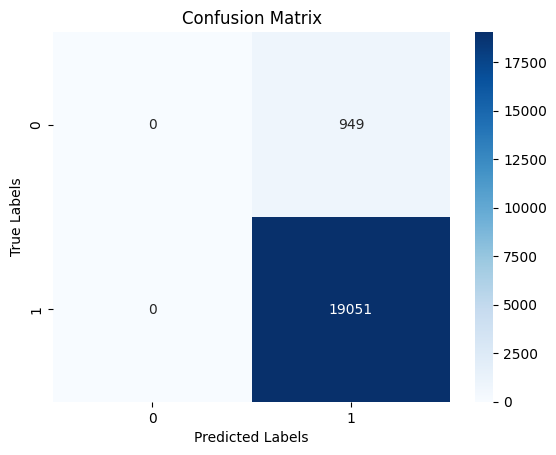

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 64/150, Loss: 0.6153474450111389


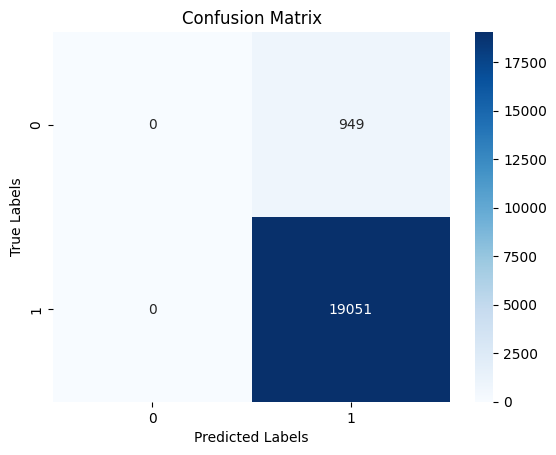

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 65/150, Loss: 0.6344937682151794


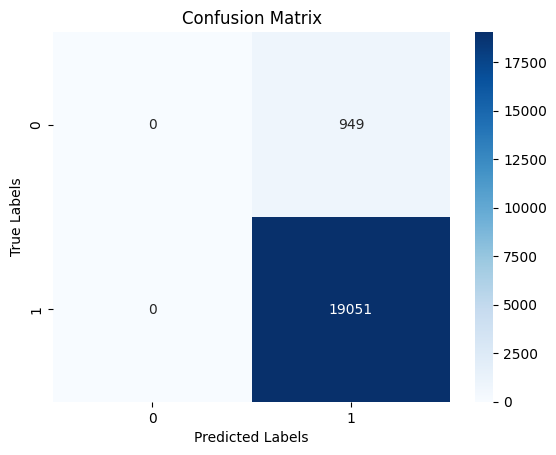

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 66/150, Loss: 0.6311888694763184


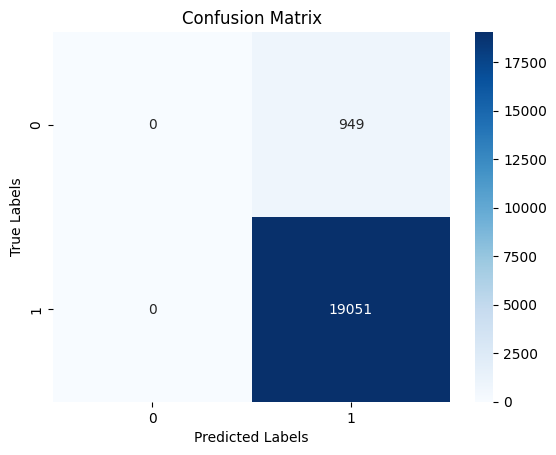

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 67/150, Loss: 0.6202216148376465


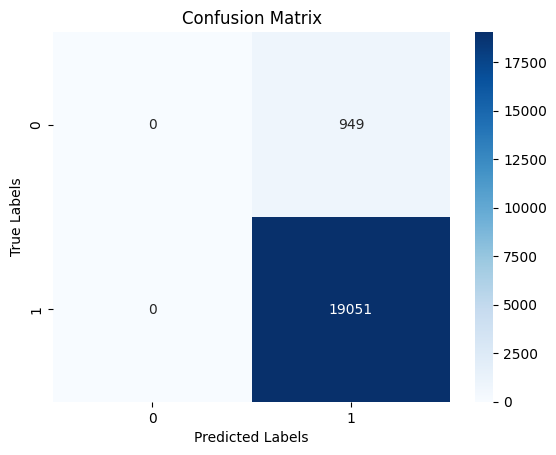

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 68/150, Loss: 0.6198368072509766


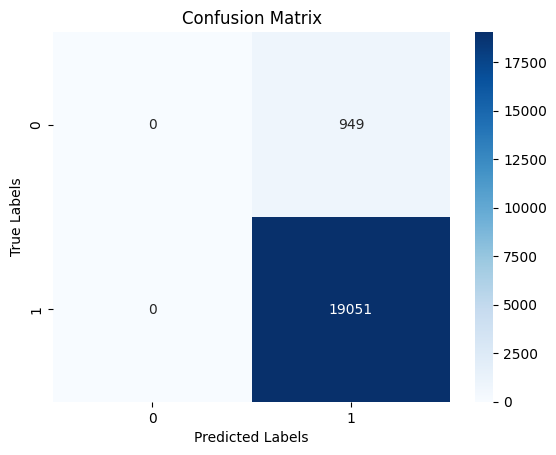

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 69/150, Loss: 0.6253135204315186


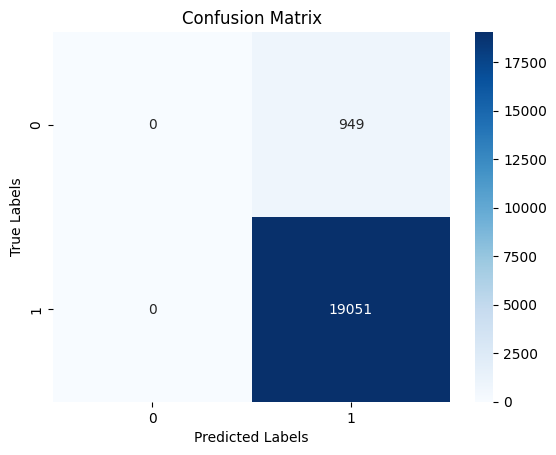

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 70/150, Loss: 0.6098440885543823


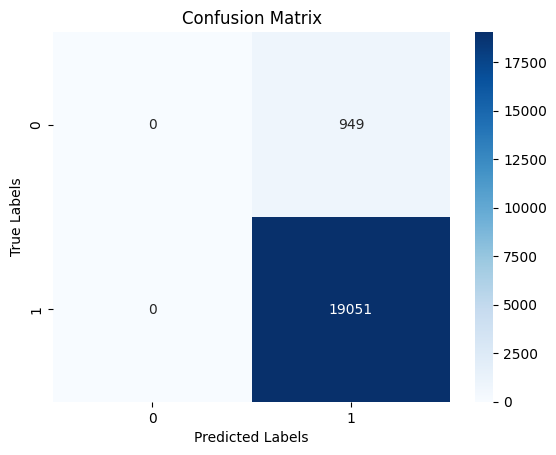

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 71/150, Loss: 0.6137139797210693


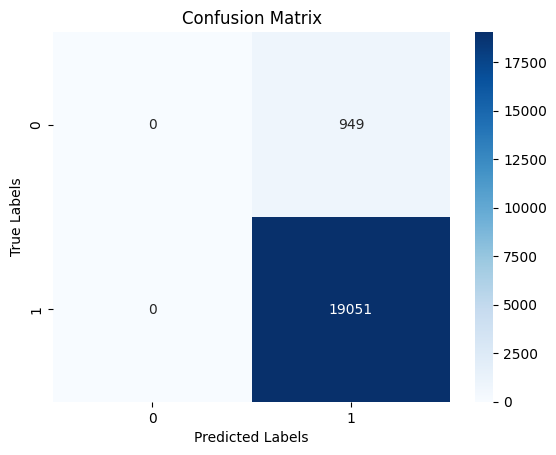

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 72/150, Loss: 0.6166647672653198


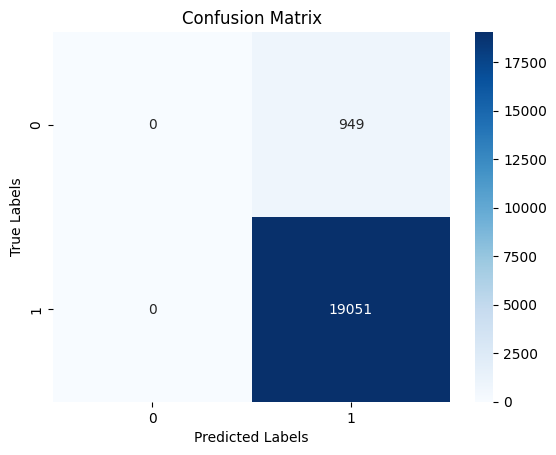

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 73/150, Loss: 0.6254348754882812


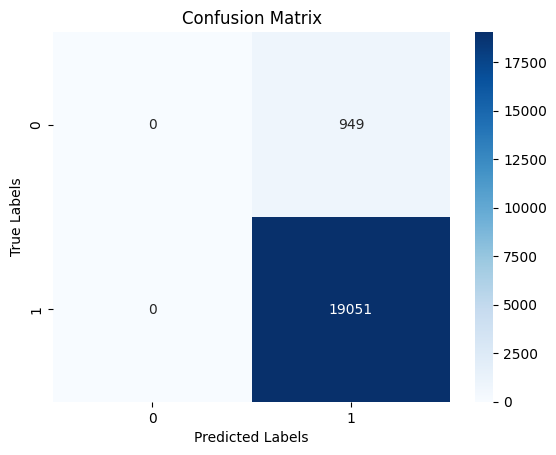

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 74/150, Loss: 0.6139911413192749


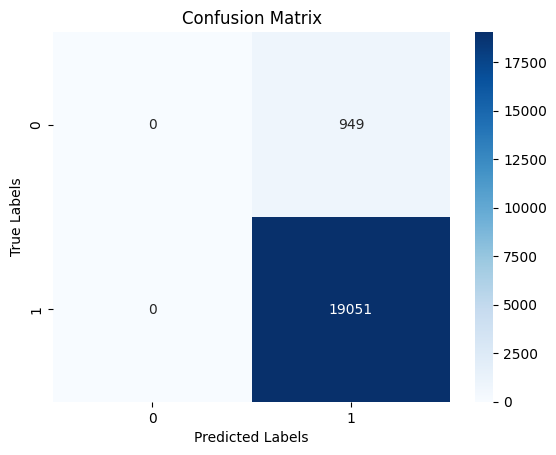

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 75/150, Loss: 0.6283665895462036


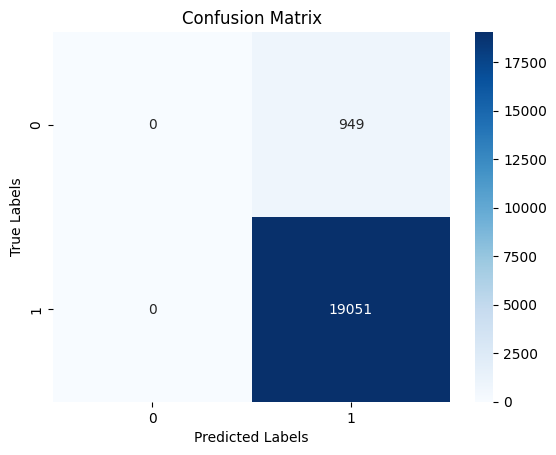

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 76/150, Loss: 0.6124157905578613


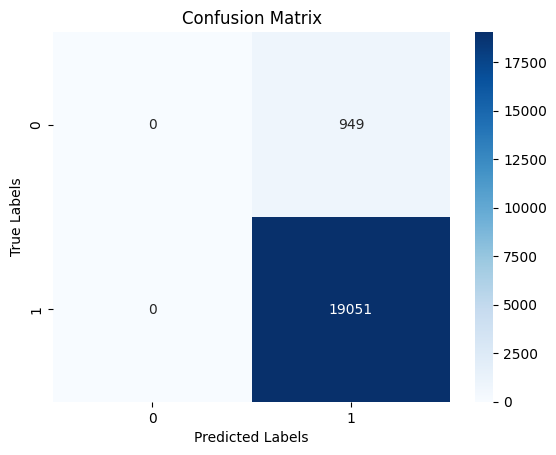

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 77/150, Loss: 0.6310330033302307


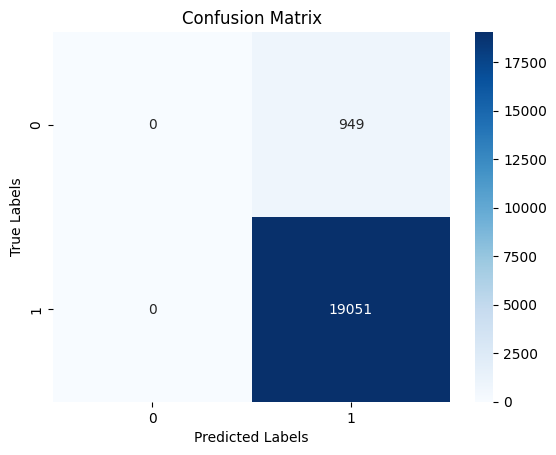

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 78/150, Loss: 0.6343680024147034


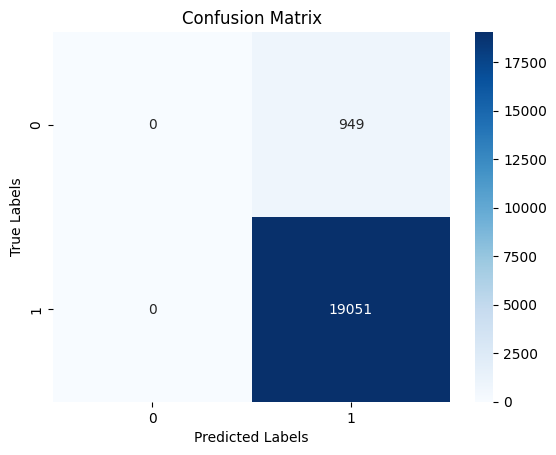

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 79/150, Loss: 0.6286437511444092


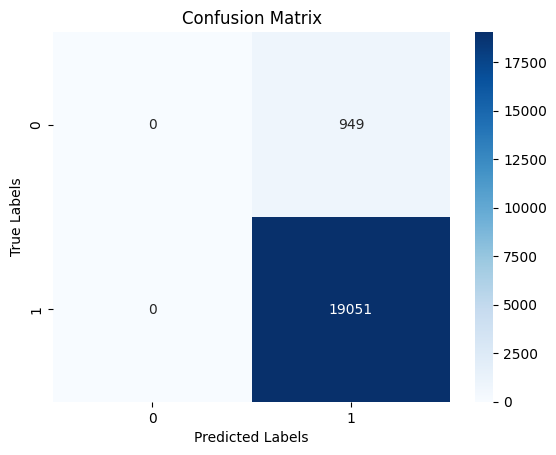

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 80/150, Loss: 0.6444634795188904


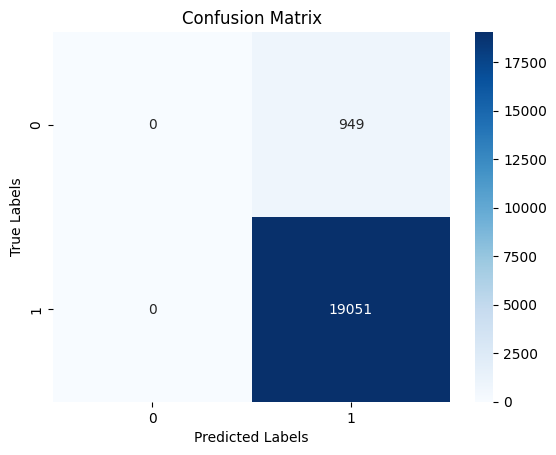

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 81/150, Loss: 0.6086835861206055


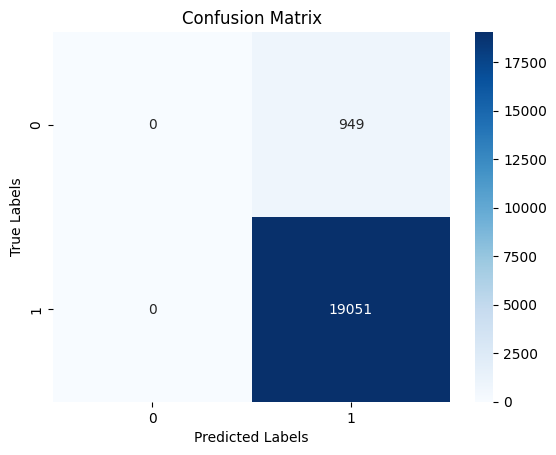

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 82/150, Loss: 0.6303704977035522


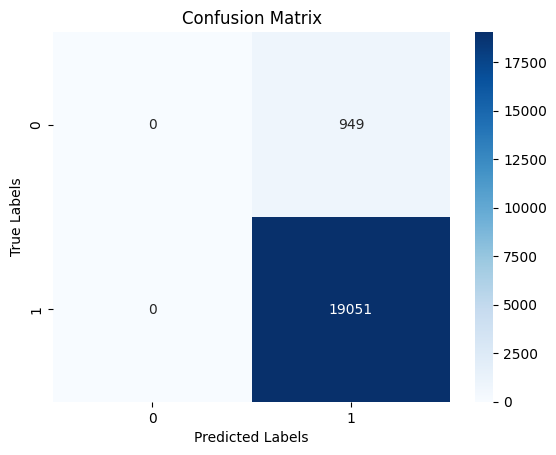

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 83/150, Loss: 0.6210402250289917


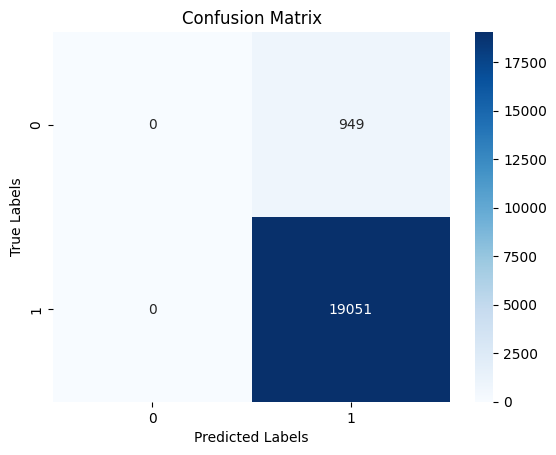

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 84/150, Loss: 0.6198367476463318


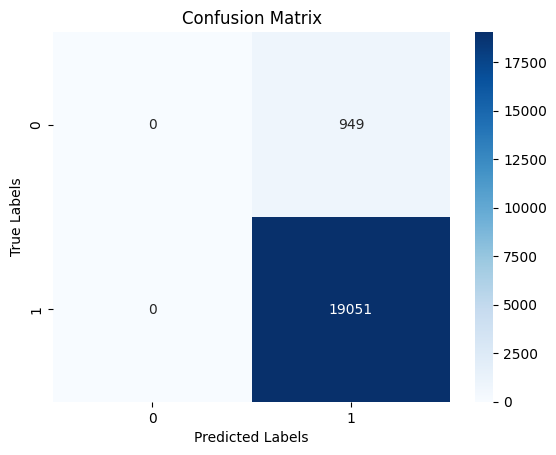

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 85/150, Loss: 0.6485769748687744


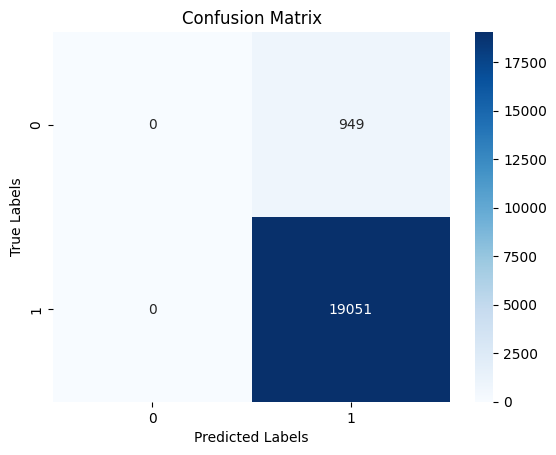

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 86/150, Loss: 0.627829909324646


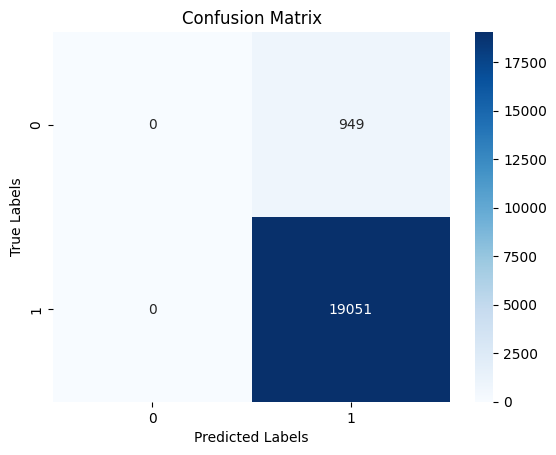

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 87/150, Loss: 0.6348742246627808


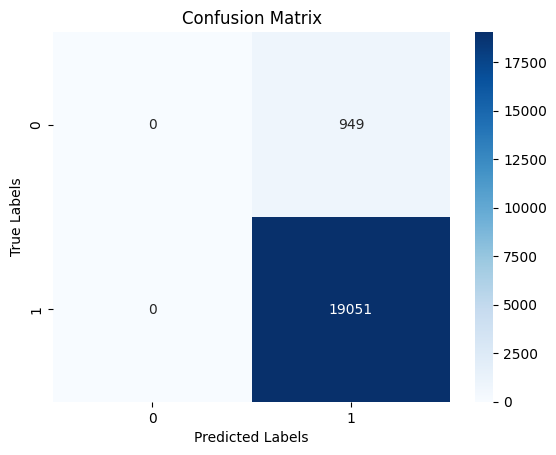

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 88/150, Loss: 0.6038426160812378


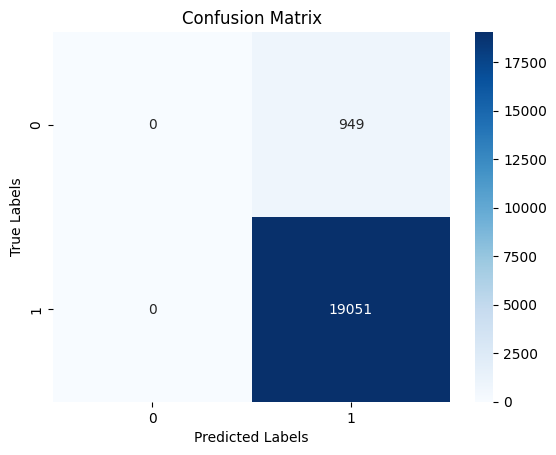

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 89/150, Loss: 0.6450542211532593


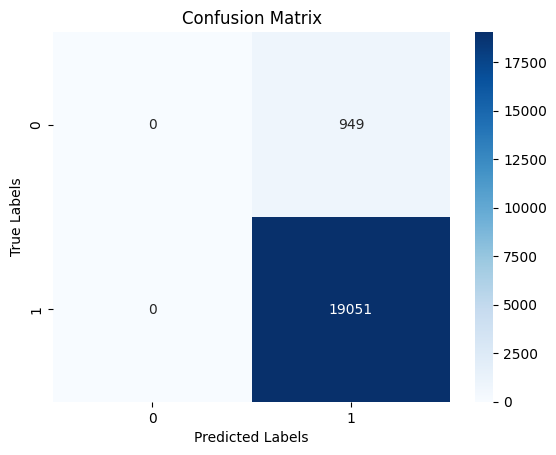

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 90/150, Loss: 0.6111999750137329


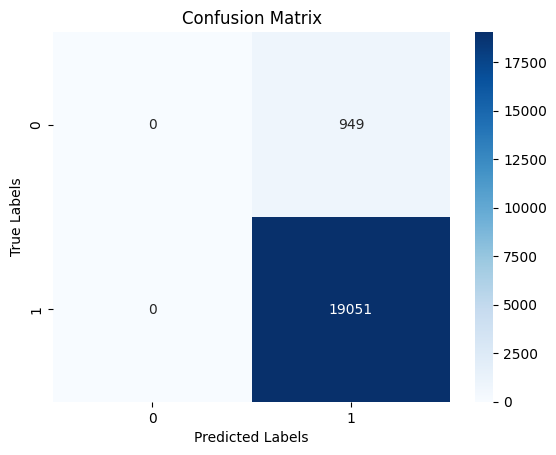

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 91/150, Loss: 0.6137139797210693


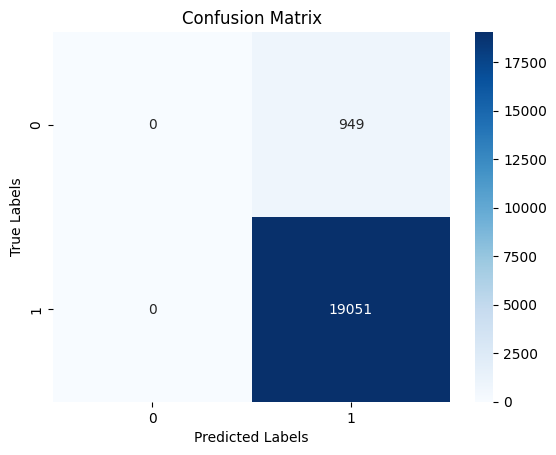

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 92/150, Loss: 0.6246510744094849


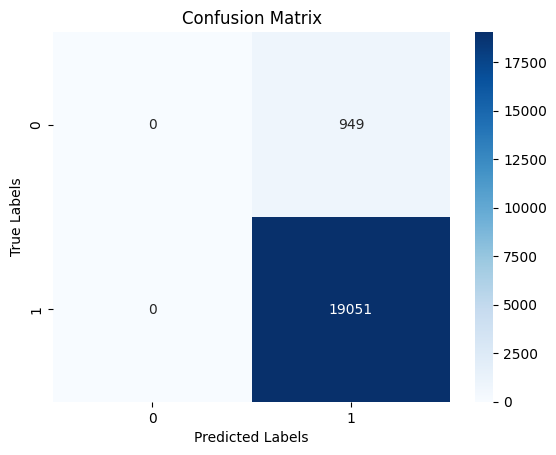

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 93/150, Loss: 0.6287699341773987


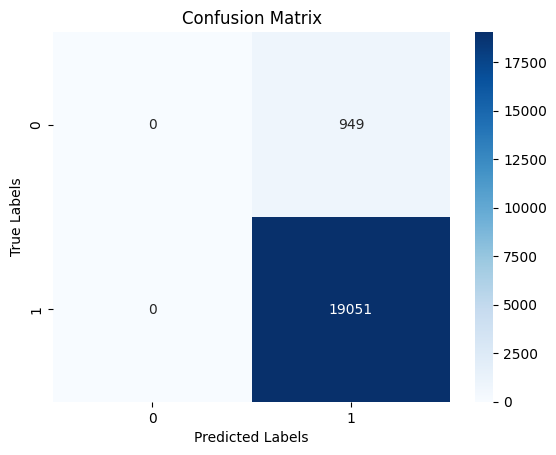

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 94/150, Loss: 0.6147797703742981


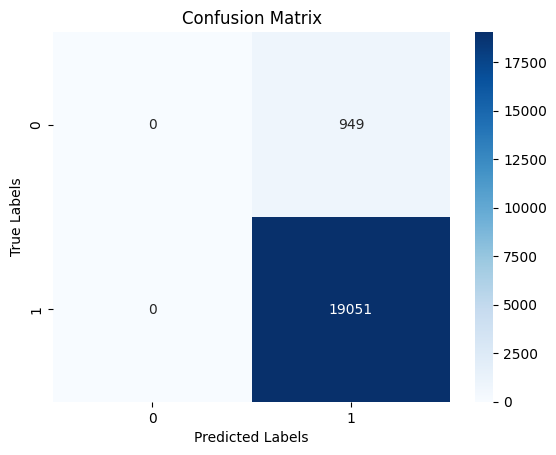

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 95/150, Loss: 0.6222274303436279


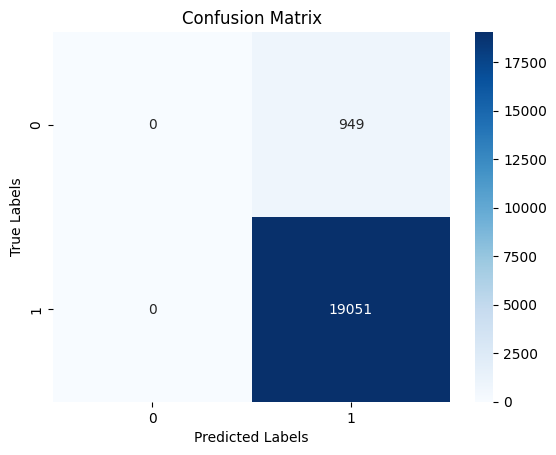

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 96/150, Loss: 0.6296133995056152


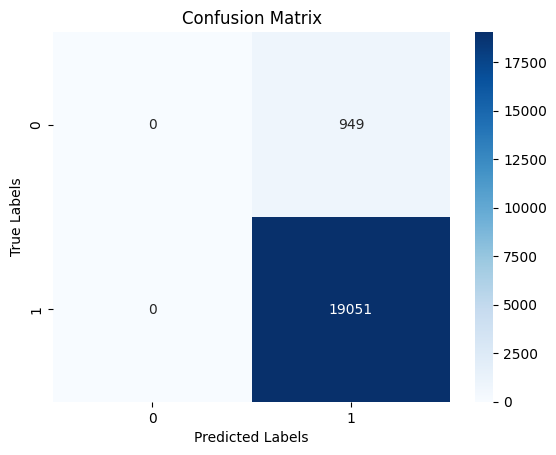

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 97/150, Loss: 0.6198872327804565


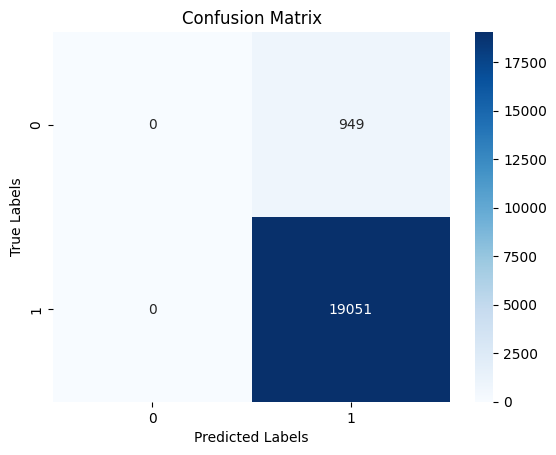

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 98/150, Loss: 0.6227951049804688


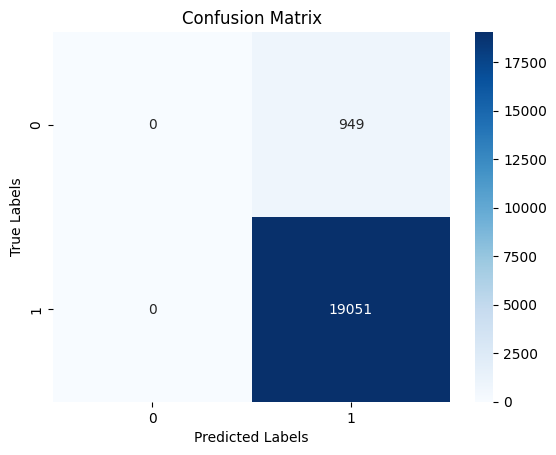

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 99/150, Loss: 0.6506441831588745


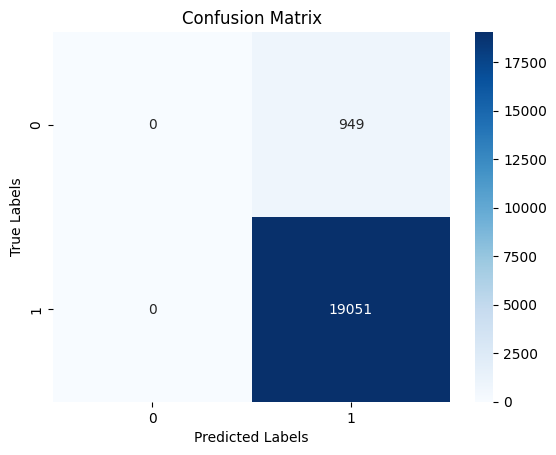

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 100/150, Loss: 0.612389087677002


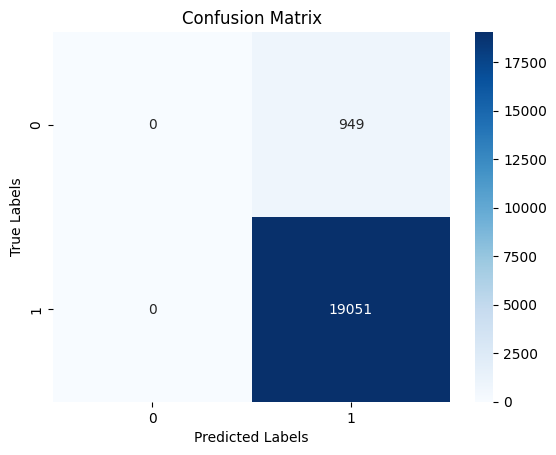

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 101/150, Loss: 0.6200715899467468


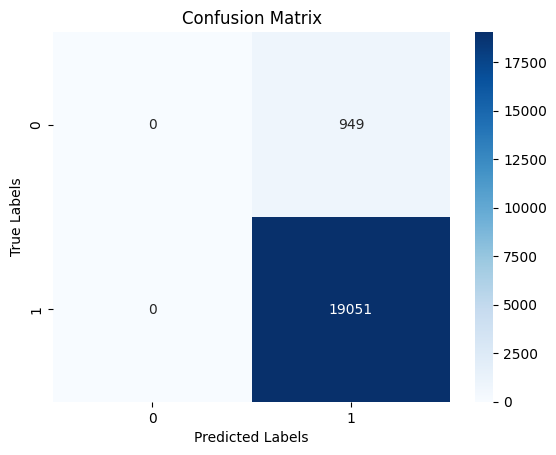

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 102/150, Loss: 0.6147797703742981


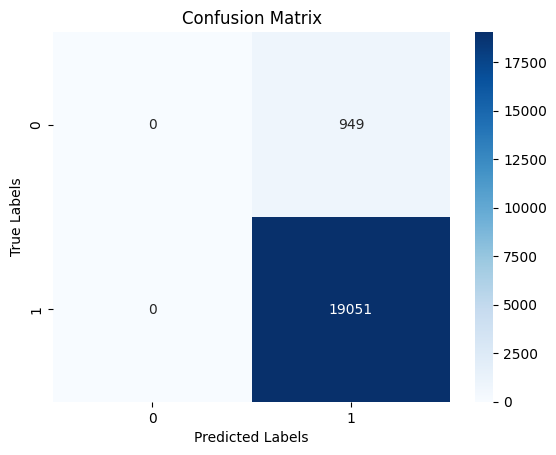

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 103/150, Loss: 0.6460539102554321


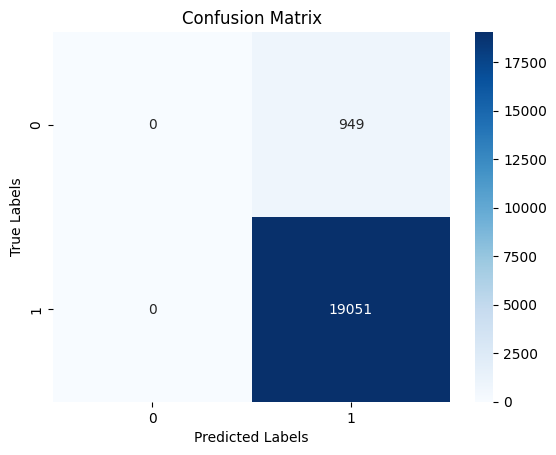

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 104/150, Loss: 0.6404935717582703


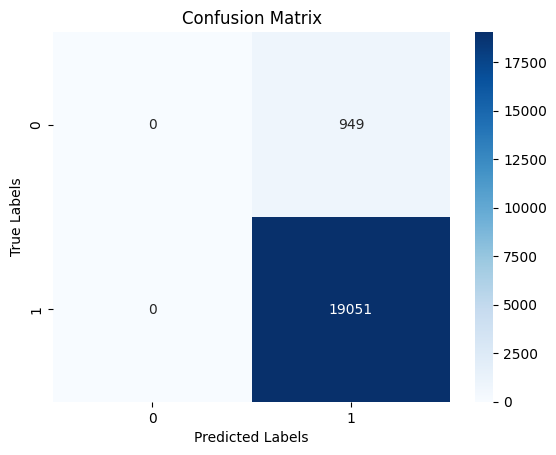

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 105/150, Loss: 0.6335449814796448


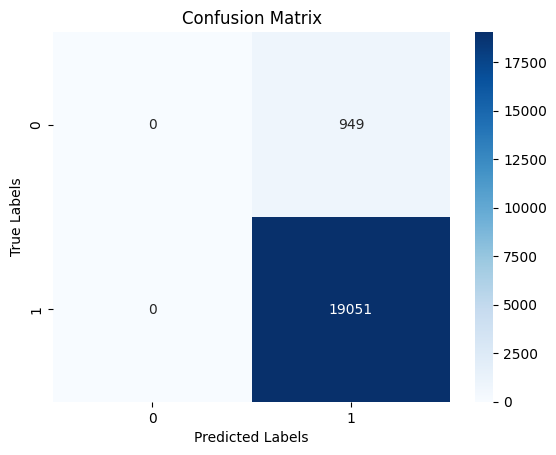

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 106/150, Loss: 0.6098440885543823


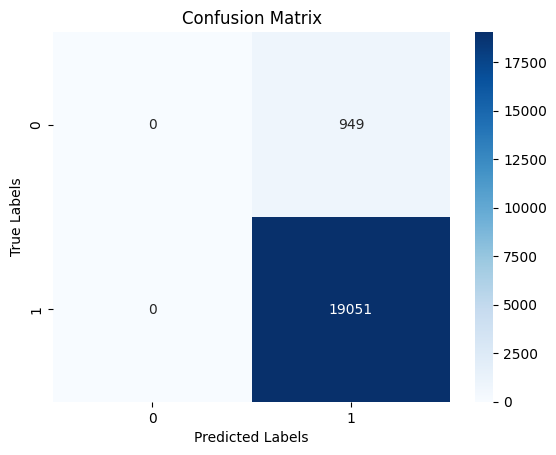

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 107/150, Loss: 0.6564974784851074


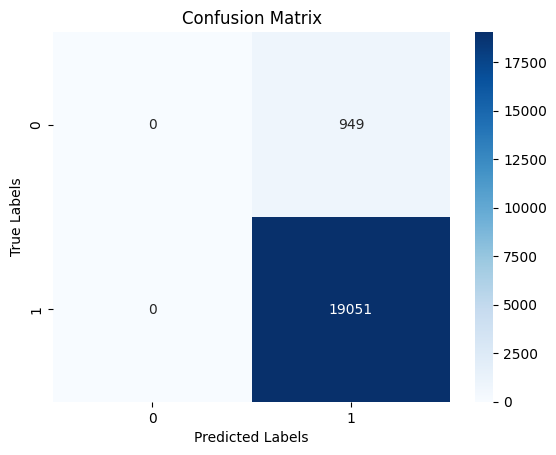

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 108/150, Loss: 0.6334567070007324


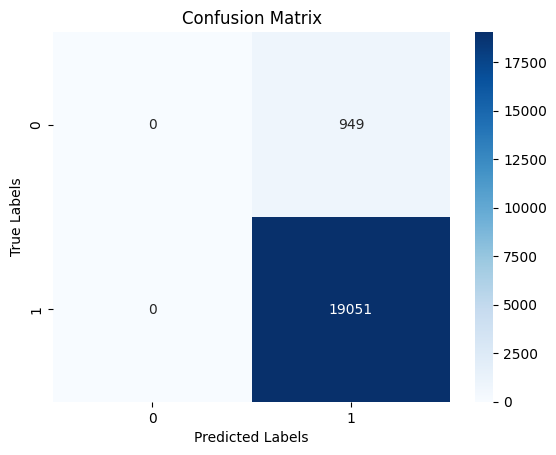

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 109/150, Loss: 0.627288818359375


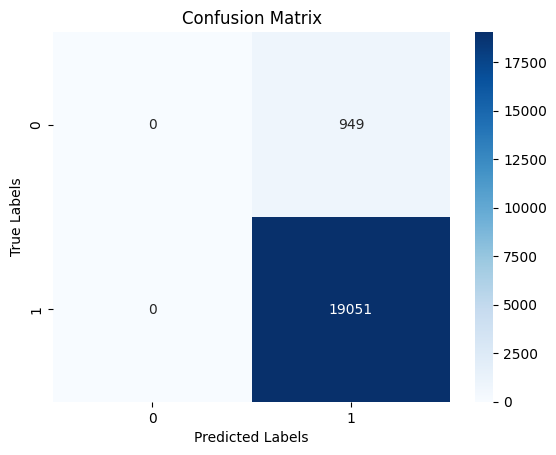

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 110/150, Loss: 0.6291428208351135


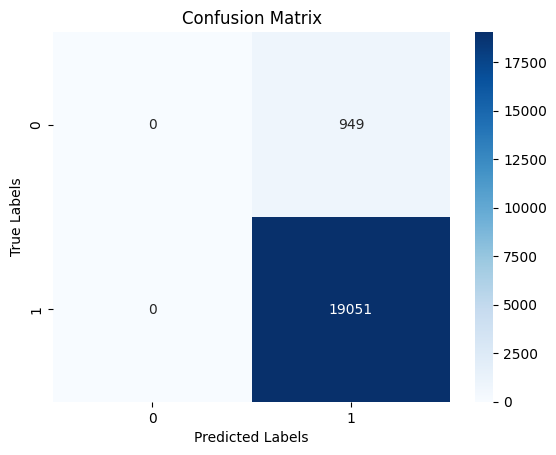

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 111/150, Loss: 0.6392688155174255


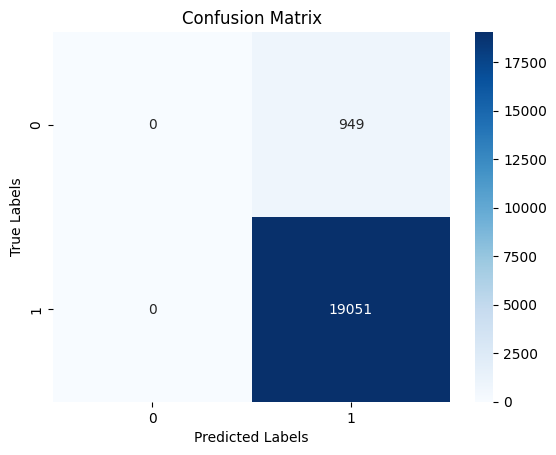

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 112/150, Loss: 0.6215693950653076


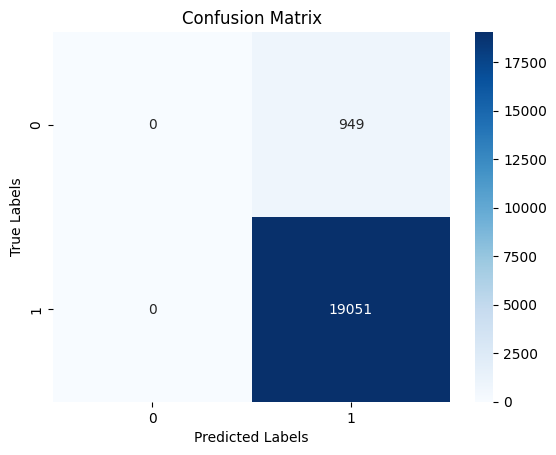

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 113/150, Loss: 0.6207811832427979


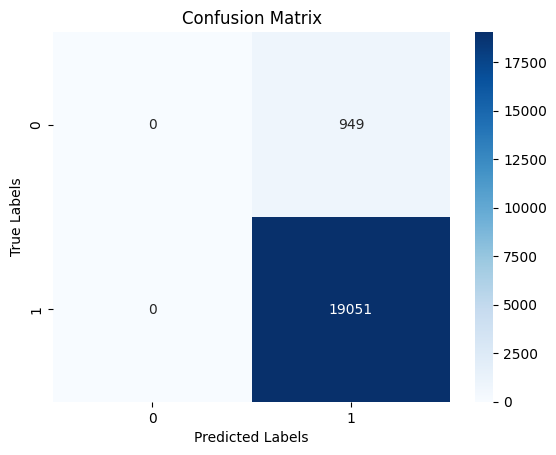

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 114/150, Loss: 0.6179872155189514


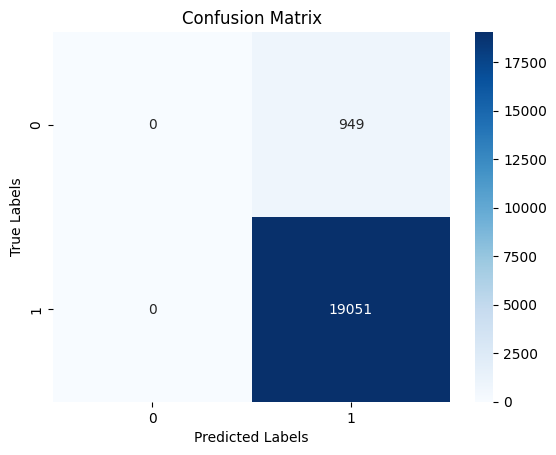

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 115/150, Loss: 0.6180843114852905


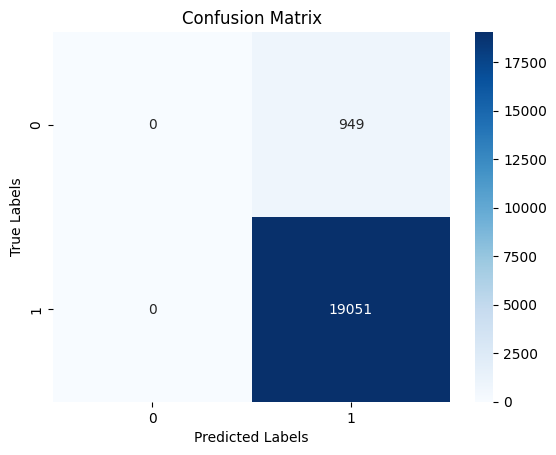

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 116/150, Loss: 0.615442156791687


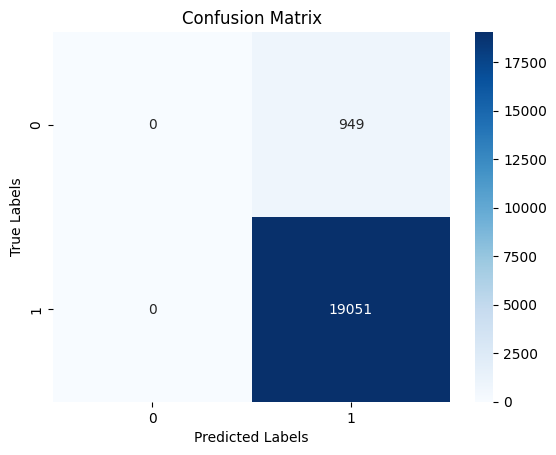

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 117/150, Loss: 0.6175552010536194


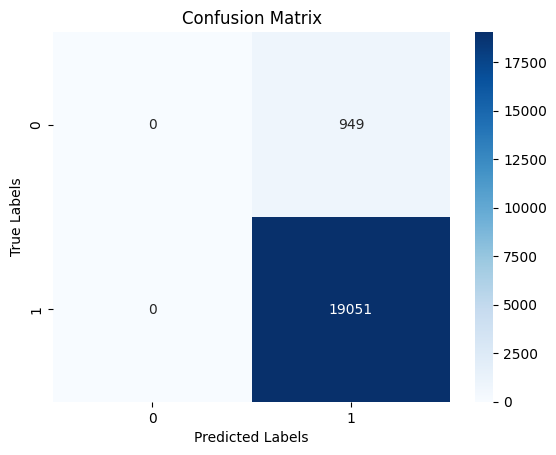

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 118/150, Loss: 0.6270416975021362


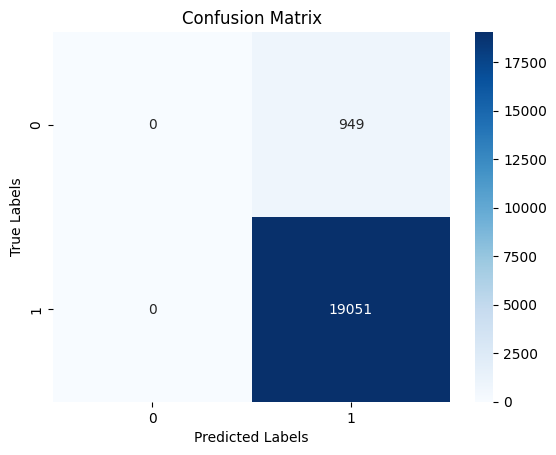

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 119/150, Loss: 0.6404900550842285


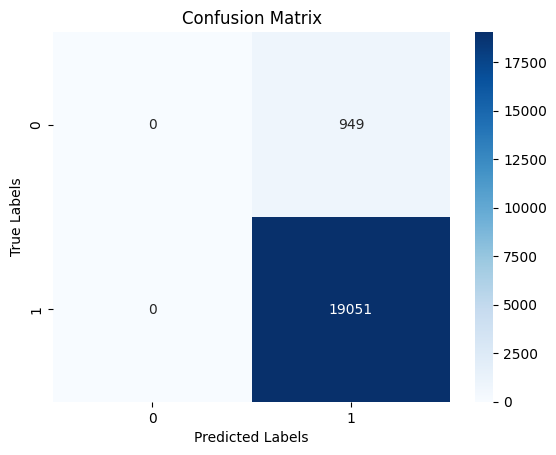

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 120/150, Loss: 0.6260973215103149


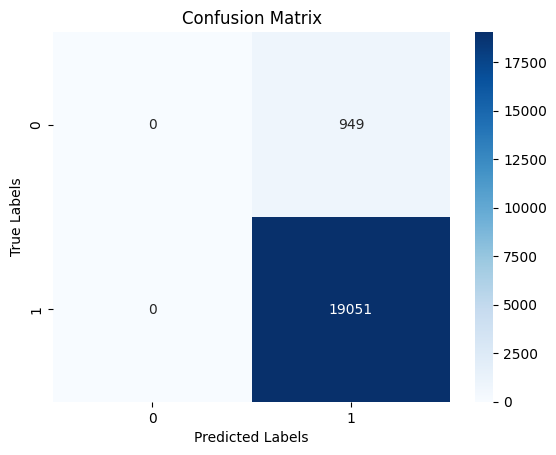

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 121/150, Loss: 0.6124937534332275


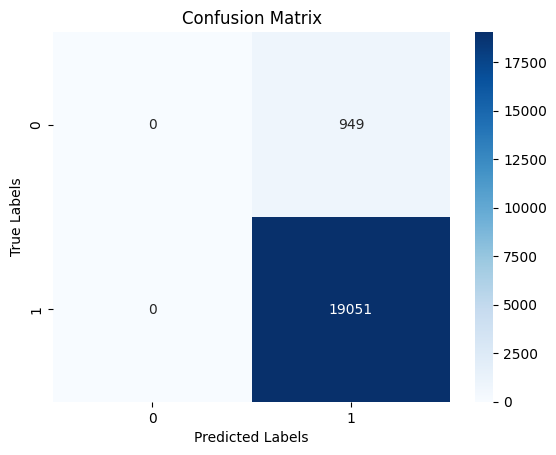

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 122/150, Loss: 0.6121996641159058


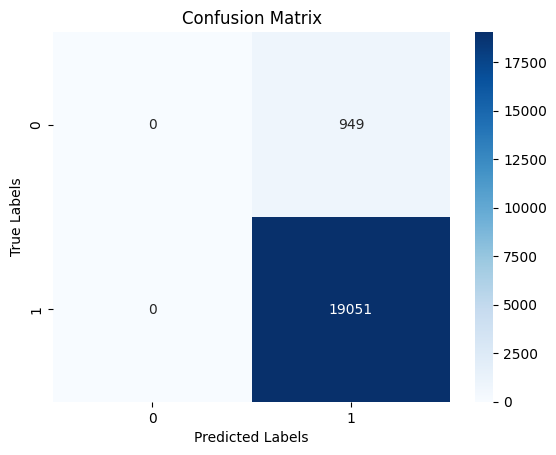

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 123/150, Loss: 0.611294686794281


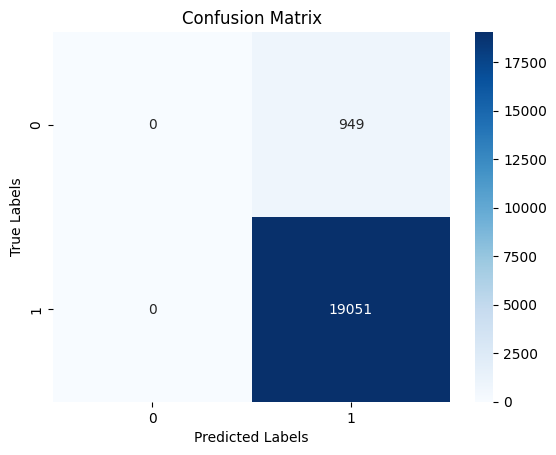

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 124/150, Loss: 0.6308048963546753


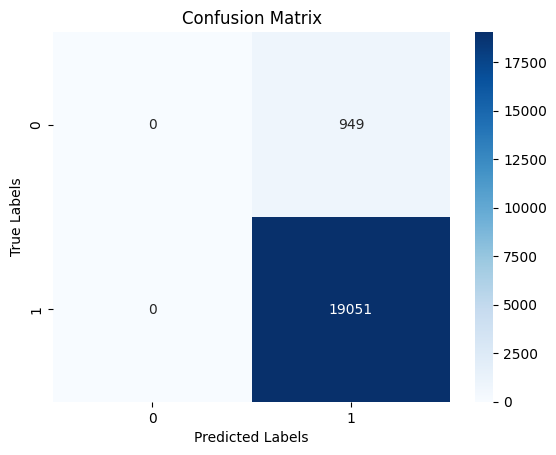

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 125/150, Loss: 0.6493180990219116


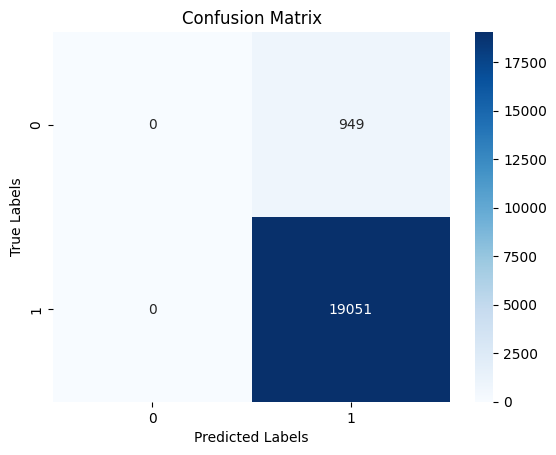

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 126/150, Loss: 0.6204991936683655


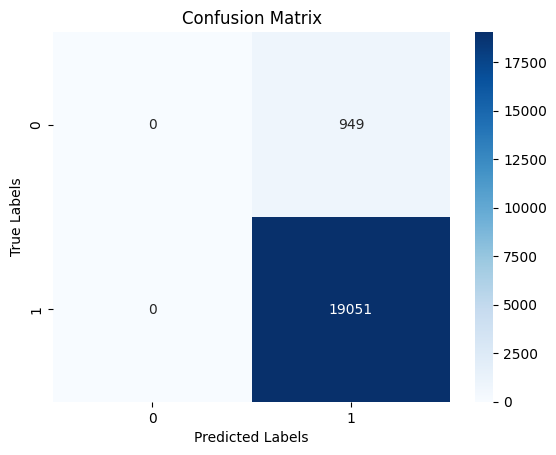

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 127/150, Loss: 0.6222317814826965


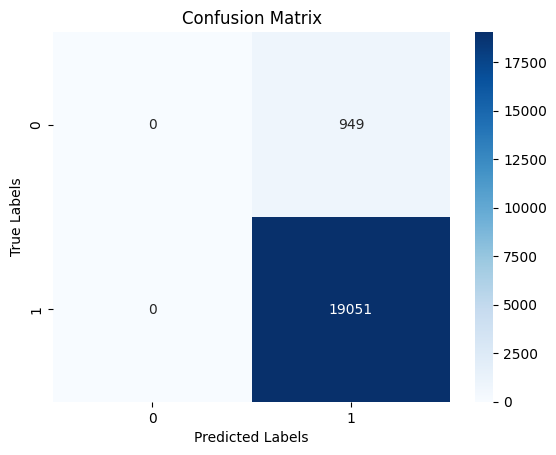

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 128/150, Loss: 0.6291547417640686


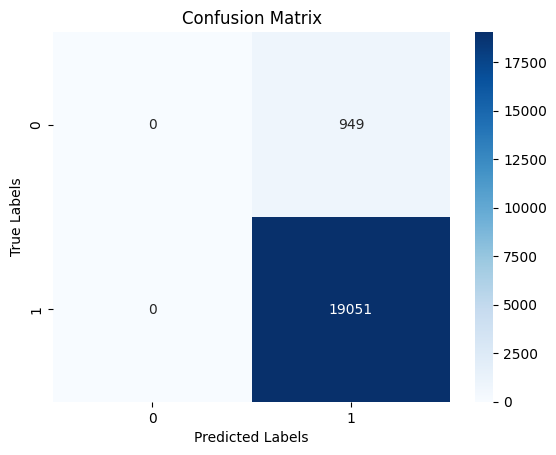

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 129/150, Loss: 0.6178324222564697


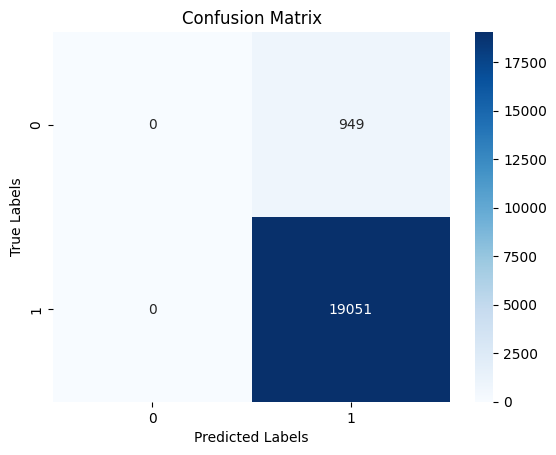

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 130/150, Loss: 0.6414389610290527


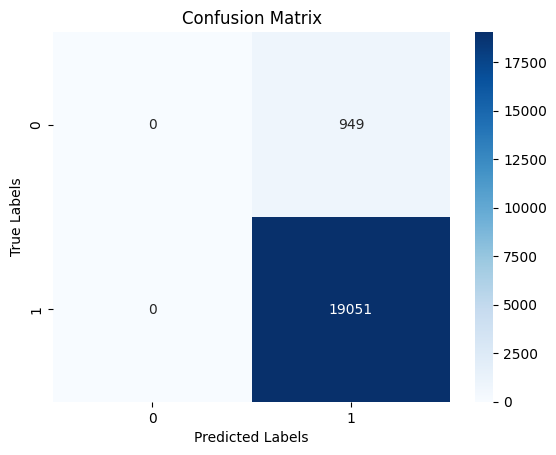

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 131/150, Loss: 0.6436634063720703


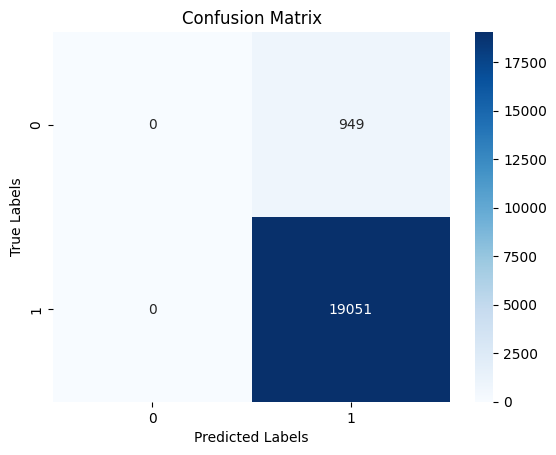

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 132/150, Loss: 0.6163517236709595


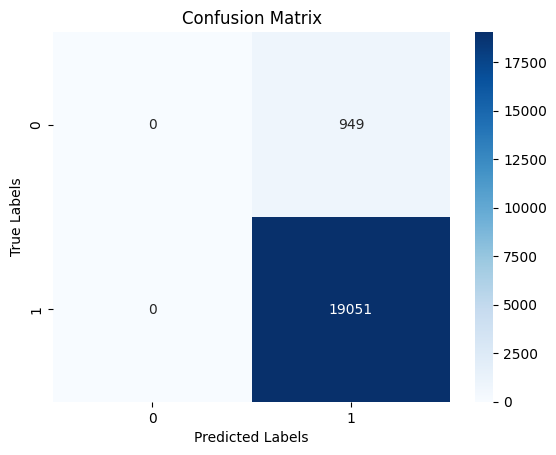

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 133/150, Loss: 0.603085458278656


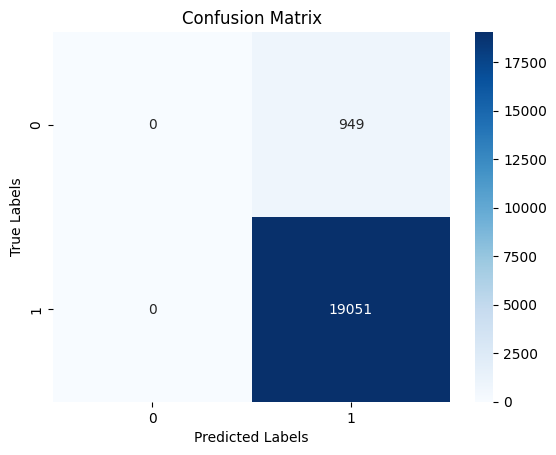

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 134/150, Loss: 0.6451444625854492


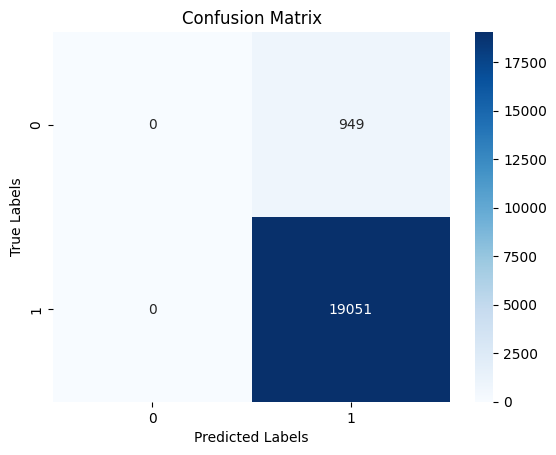

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 135/150, Loss: 0.6222274303436279


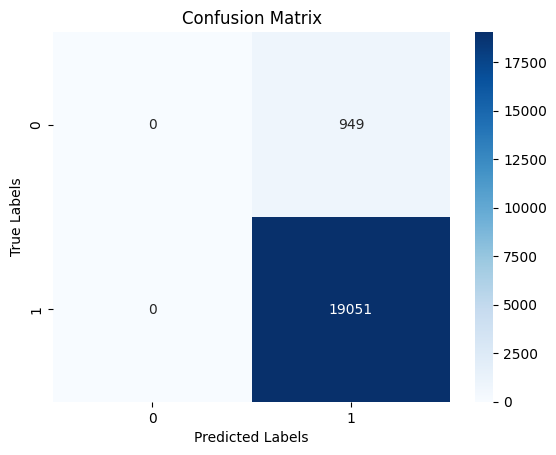

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 136/150, Loss: 0.6419458389282227


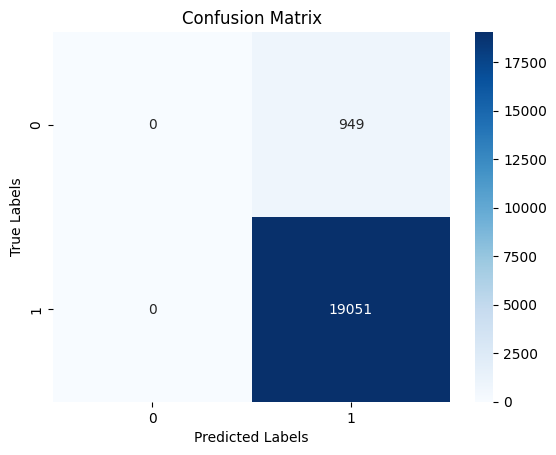

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 137/150, Loss: 0.6327348947525024


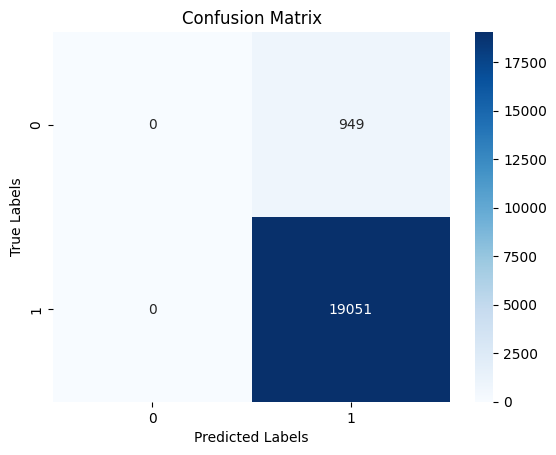

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 138/150, Loss: 0.6228942275047302


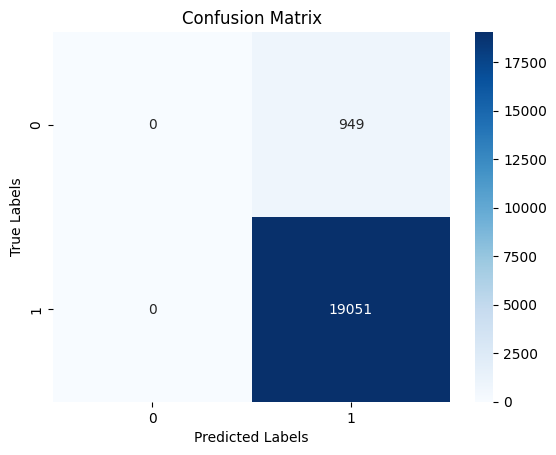

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 139/150, Loss: 0.6147797107696533


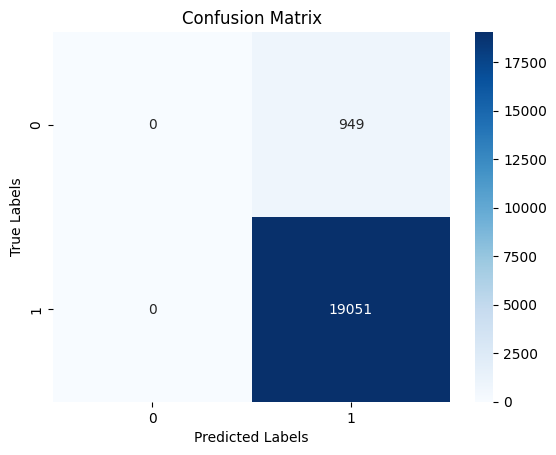

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 140/150, Loss: 0.6209959983825684


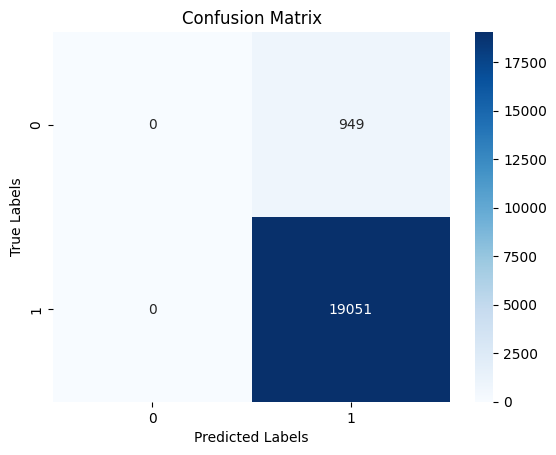

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 141/150, Loss: 0.6425755023956299


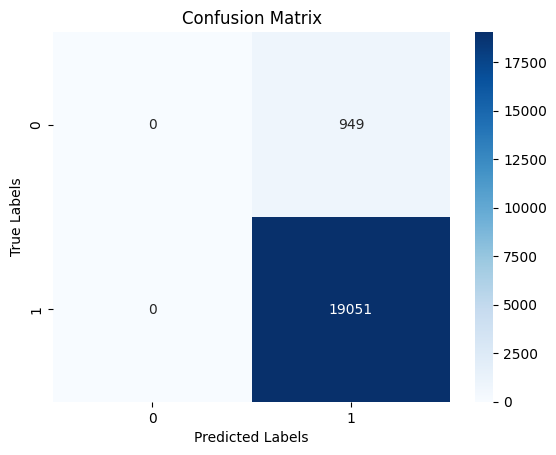

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 142/150, Loss: 0.6225094199180603


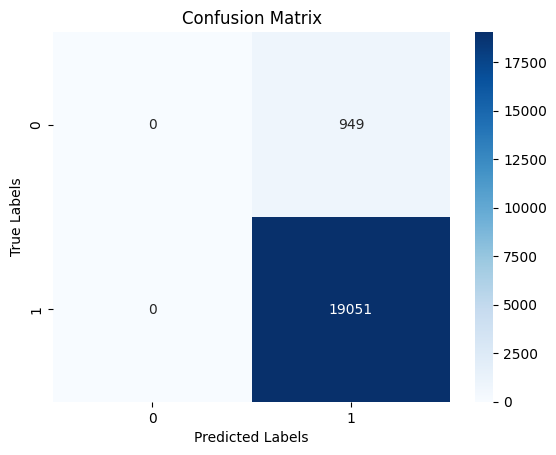

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 143/150, Loss: 0.6098440885543823


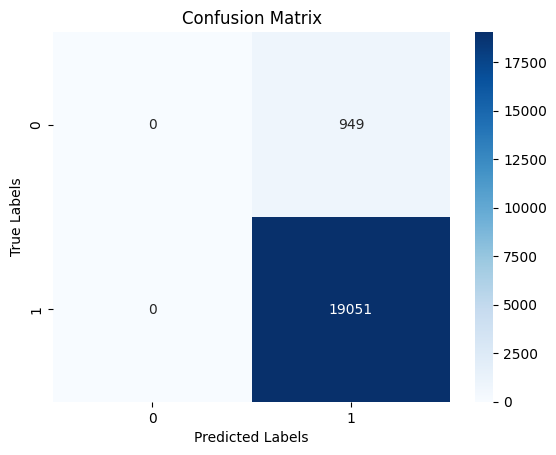

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 144/150, Loss: 0.6330698132514954


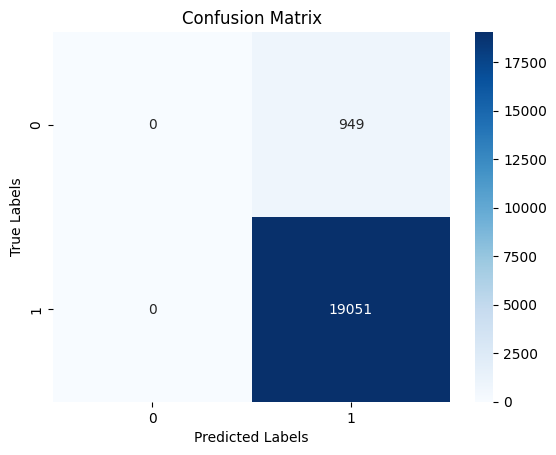

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 145/150, Loss: 0.6244966983795166


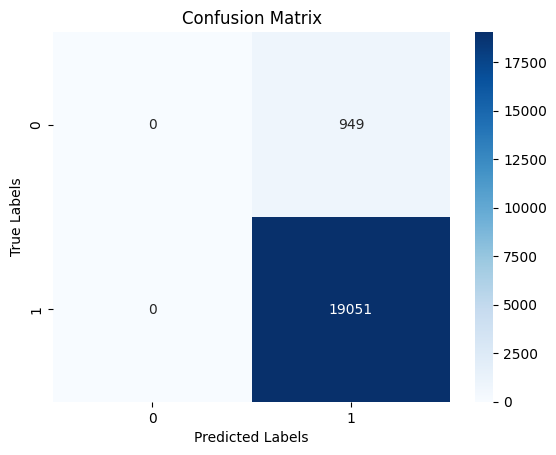

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 146/150, Loss: 0.6157013177871704


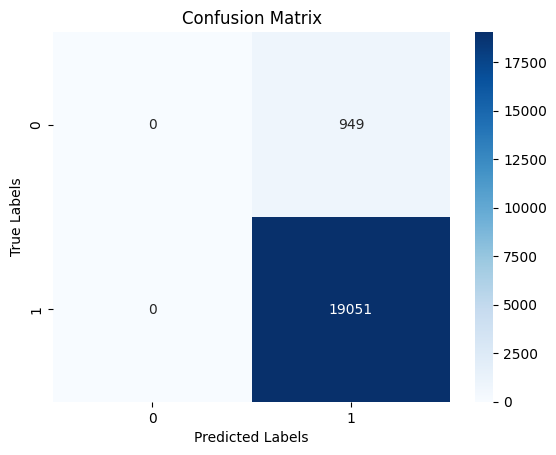

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 147/150, Loss: 0.6197154521942139


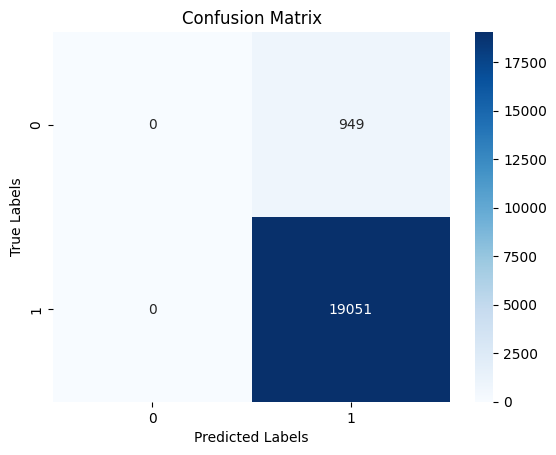

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 148/150, Loss: 0.6503666043281555


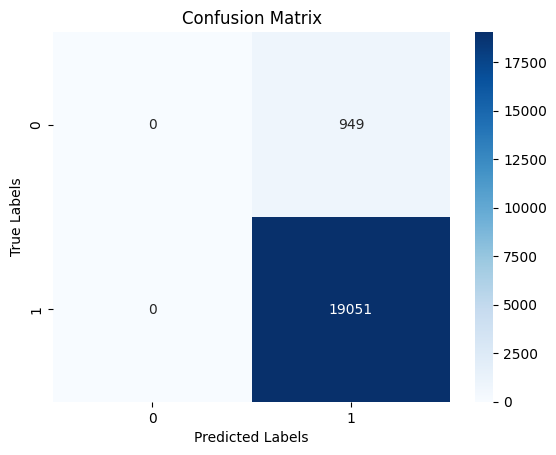

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 149/150, Loss: 0.6316953897476196


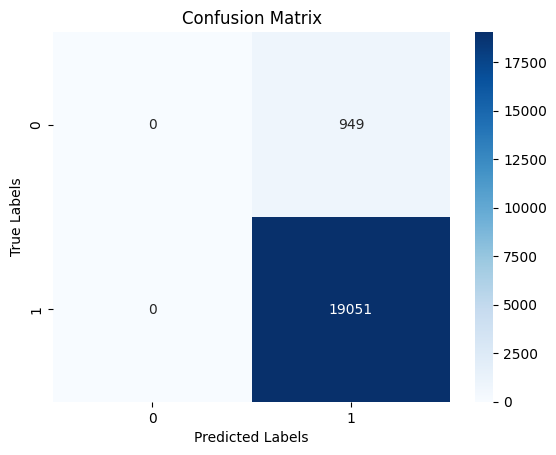

Accuracy :95.255%
Precision = 0.95255
Recall = 1.0
F1 Score = 0.9756984456223913
Epoch 150/150, Loss: 0.6150388717651367


In [ ]:
# Define a function to reset the model and optimizer
def reset_model_and_optimizer():
    model.apply(weight_reset)  # Reset model parameters to initial state
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Reinitialize optimizer
    model.to(device)  # Move model to the appropriate device

# Weight reset function to be used with model.apply()
def weight_reset(m):
    if isinstance(m, nn.Conv1d) or isinstance(m, nn.Linear):
        m.reset_parameters()

plot_accuracy = []
plot_loss = []

best_model_epoch = 0
num_epochs = 150
save_interval = 30

for epoch in range(num_epochs):
    for inputs, targets in training_dataloader:
        inputs = inputs.to(device, dtype=torch.float32)
        targets = targets.to(device, dtype=torch.float32)
        # Forward pass
        outputs = model(inputs)
        # Reshape the target tensor
        targets = targets.view(-1, 2)

        loss = criterion(outputs, targets)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    round_loss, round_accuracy = test(model, test_dataloader, criterion)
    plot_loss.append(round_loss)
    plot_accuracy.append(round_accuracy)

    # Print the loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

    # Perform validation on the validation dataset and calculate accuracy
    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for val_inputs, val_targets in test_dataloader:
            val_inputs = val_inputs.to(torch.float32).to(device)
            val_targets = val_targets.to(torch.float32).to(device)

            check_label = torch.Tensor()
            check_label = torch.argmax(val_targets, dim=1)

            val_outputs = model(val_inputs)
            _, predicted = torch.max(val_outputs.data, 1)
            total_samples += val_targets.size(0)
            total_correct += (predicted == check_label).sum().item()
        validation_accuracy = total_correct / total_samples

    # Save the model checkpoint only if it's better than the previous best
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'epoch': epoch + 1,
            'best_accuracy': best_accuracy,
            # Add any other information you want to save
        }, '/content/drive/MyDrive/專題/Pong model/best_model.pth')
        best_model_epoch = epoch+1
        print(f'Best model saved, epoch = {epoch+1}.')

    # Save the model checkpoint every 20 epochs and reset the model
    if (epoch + 1) % save_interval == 0:
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'epoch': epoch + 1,
            'best_accuracy': best_accuracy,
            # Add any other information you want to save
        }, f'/content/drive/MyDrive/專題/Pong model/checkpoint_epoch_{epoch+1}.pth')
        reset_model_and_optimizer()



Epoch 1/20, Loss: 0.6197078824043274


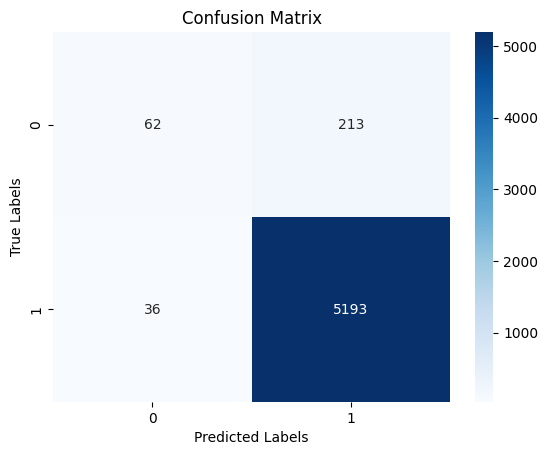

Epoch 2/20, Loss: 0.6097823977470398


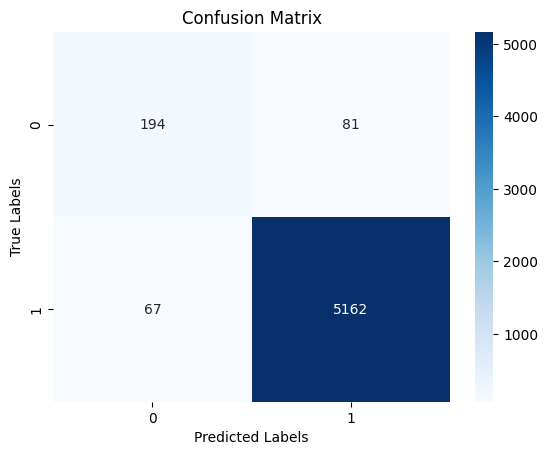

Epoch 3/20, Loss: 0.6144379377365112


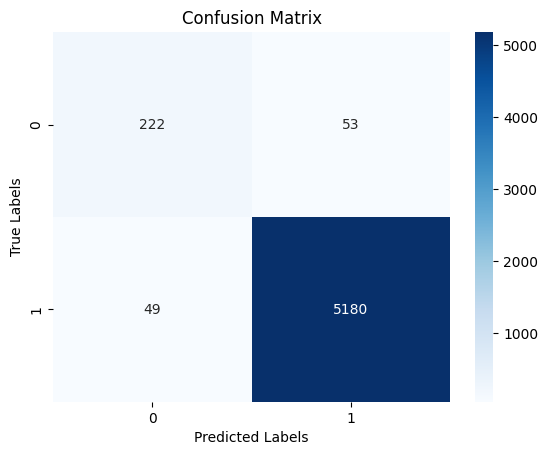

Epoch 4/20, Loss: 0.6100916266441345


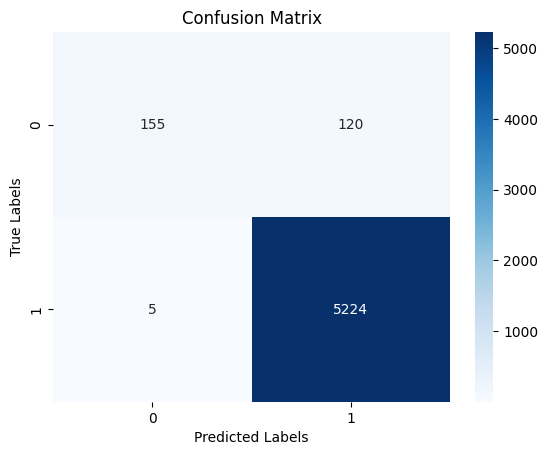

Epoch 5/20, Loss: 0.610458493232727


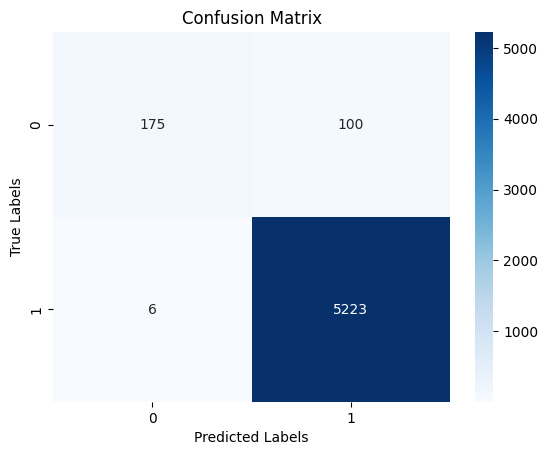

Epoch 6/20, Loss: 0.6162493228912354


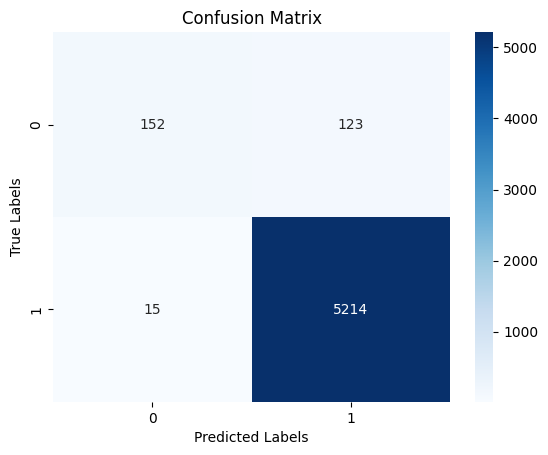

Epoch 7/20, Loss: 0.6034379601478577


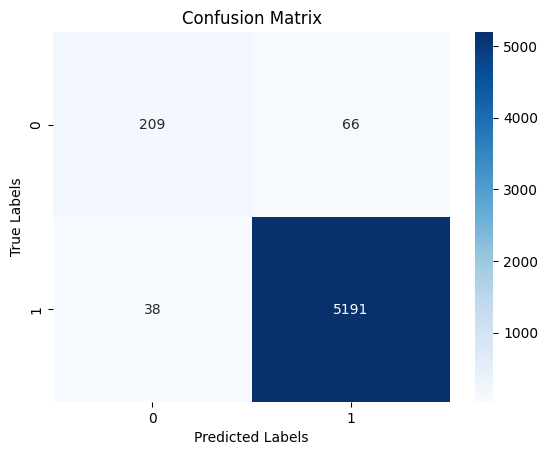

Epoch 8/20, Loss: 0.6056218147277832


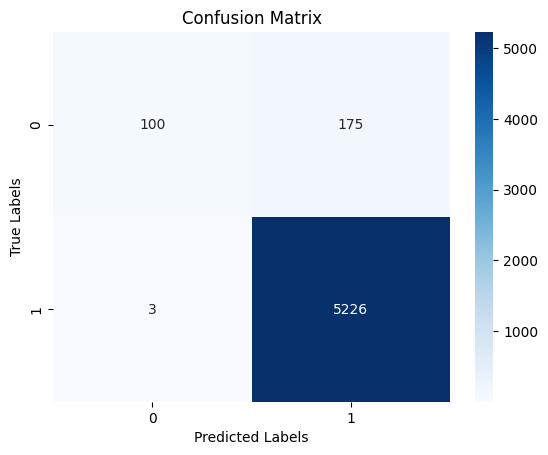

Epoch 9/20, Loss: 0.609028160572052


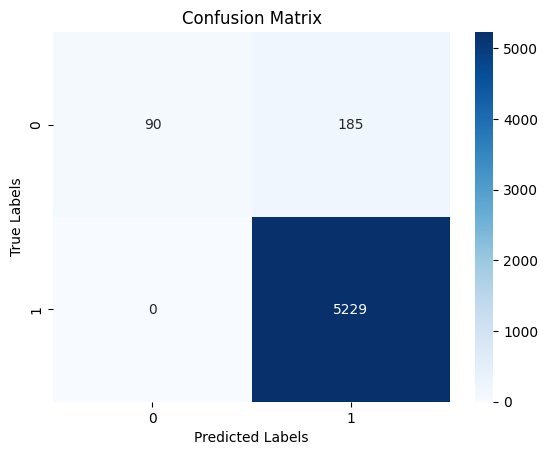

Epoch 10/20, Loss: 0.6200304627418518


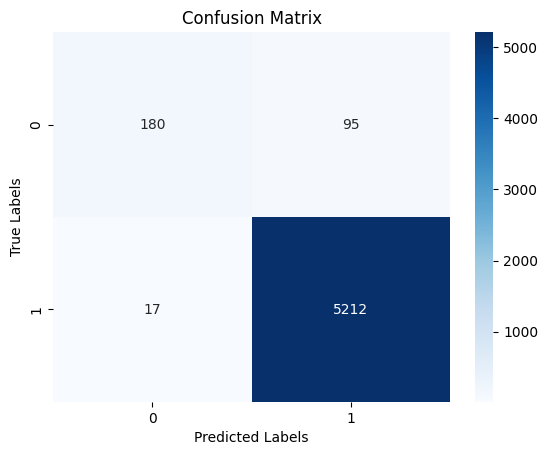

Epoch 11/20, Loss: 0.6053013801574707


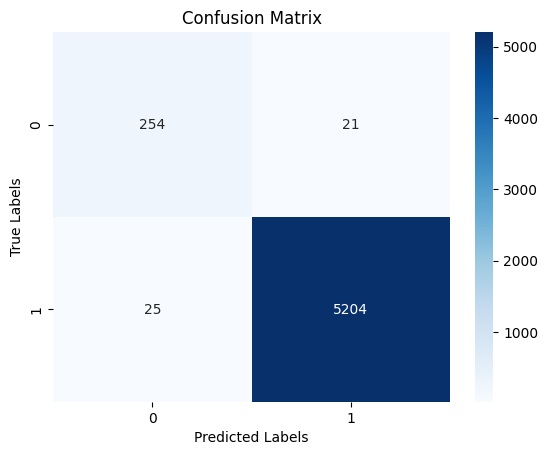

Epoch 12/20, Loss: 0.6210049986839294


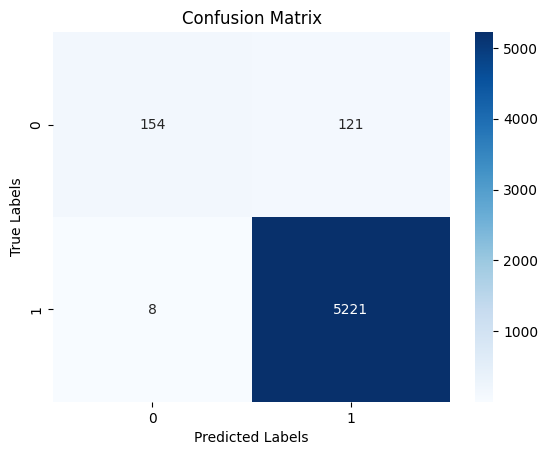

Epoch 13/20, Loss: 0.6063265204429626


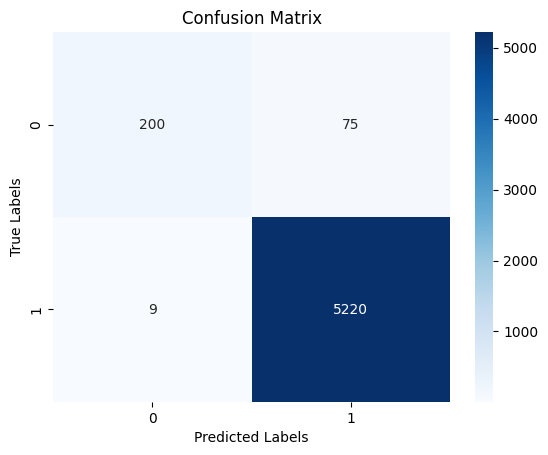

Epoch 14/20, Loss: 0.6178537607192993


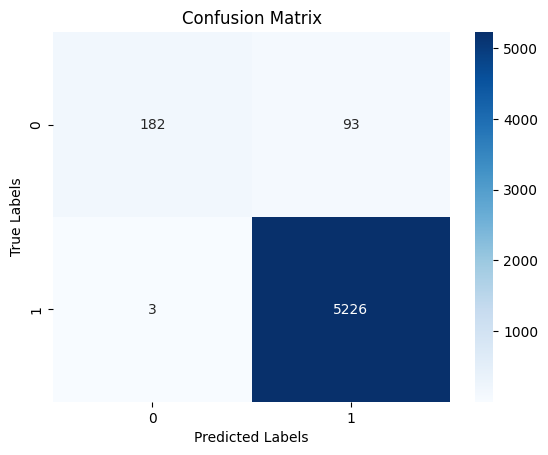

Epoch 15/20, Loss: 0.6105949282646179


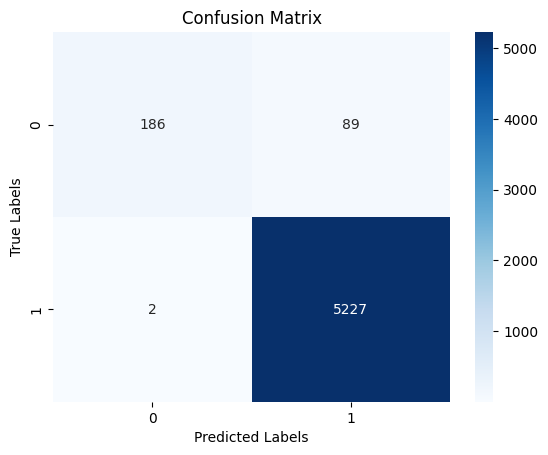

Epoch 16/20, Loss: 0.6073485016822815


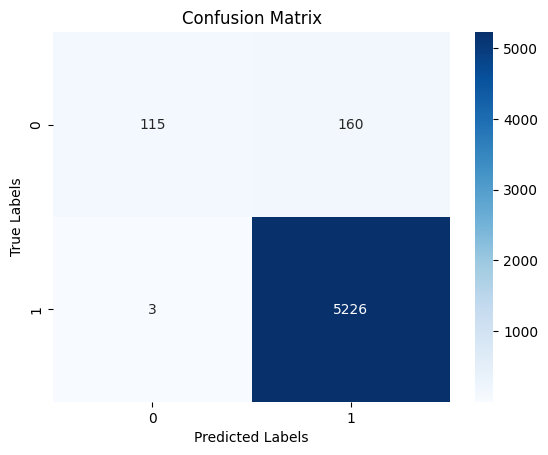

Epoch 17/20, Loss: 0.6115472912788391


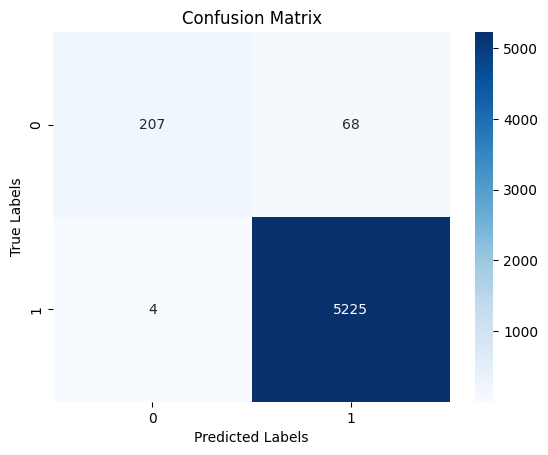

Epoch 18/20, Loss: 0.619415283203125


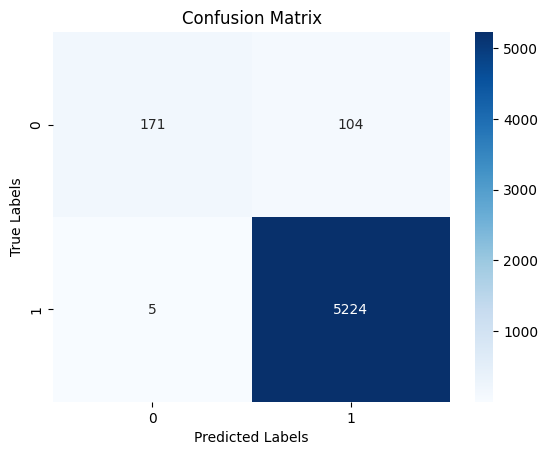

Epoch 19/20, Loss: 0.6089176535606384


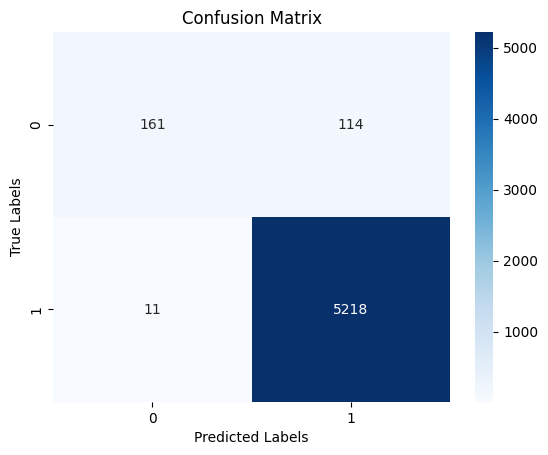

Epoch 20/20, Loss: 0.6084024906158447


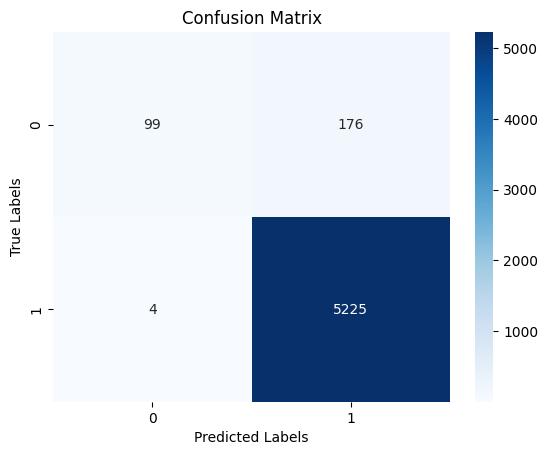

In [ ]:
plot_accuracy = []
plot_loss = []

num_epochs = 20

for epoch in range(num_epochs):
    for inputs, targets in training_dataloader:
      inputs = inputs.to(torch.float32).to(device)
      targets = targets.to(torch.float32).to(device)
      # Forward pass
      outputs = model(inputs)

      # Reshape the target tensor
      targets = targets.view(-1, 2)

      # print(outputs)

      # Compute the loss
      loss = criterion(outputs, targets)

      # Backward pass and optimization
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # Print the loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")
    round_loss, round_accuracy = test(model, test_dataloader, criterion)
    plot_loss.append(round_loss)
    plot_accuracy.append(round_accuracy)


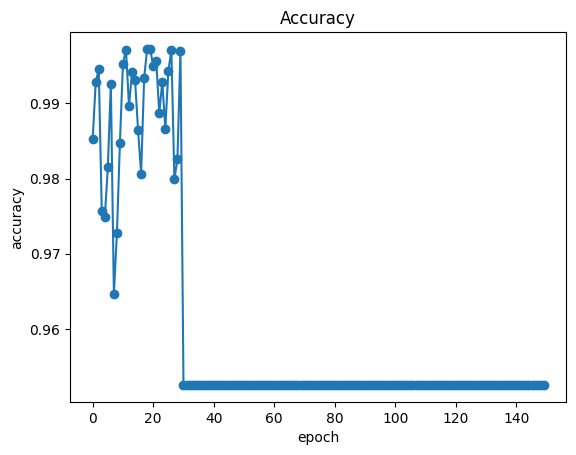

In [ ]:
import matplotlib.pyplot as plt

# Generate x-axis values (0 to len(data) - 1)
accuracy_x = range(len(plot_accuracy))

# Plot the data as a line chart
plt.plot(accuracy_x, plot_accuracy, marker='o')

# Add labels and title
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')

# Display the chart
plt.show()


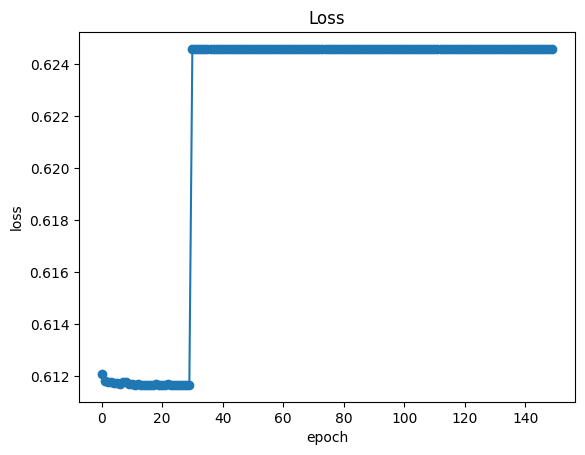

In [ ]:
# Generate x-axis values (0 to len(data) - 1)
loss_x = range(len(plot_loss))

# Plot the data as a line chart
plt.plot(loss_x, plot_loss, marker='o')

# Add labels and title
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')

# Display the chart
plt.show()


# Check best model

In [ ]:
best_model = torch.load('/content/drive/MyDrive/專題/Pong model/best_model.pth')

# checkpoint = torch.load('/content/drive/MyDrive/專題/Pong model/checkpoint_epoch_50.pth')

In [ ]:
model = Majhong_Model()
model.load_state_dict(best_model['model_state_dict'])
# model.load_state_dict(checkpoint['model_state_dict'])


model = model.to(device)
criterion = criterion.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
optimizer.load_state_dict(best_model['optimizer_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
model.eval()

Majhong_Model(
  (conv1): Conv1d(2, 256, kernel_size=(3,), stride=(1,), padding=same)
  (conv2): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=same)
  (conv_last): Conv1d(256, 32, kernel_size=(3,), stride=(1,))
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

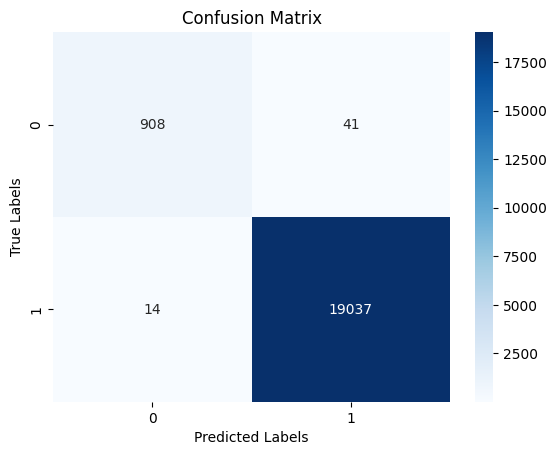

Accuracy :99.725%
Precision = 0.9978509277702066
Recall = 0.9992651304393471
F1 Score = 0.998557528390464
19


In [ ]:
test(model, test_dataloader, criterion)
print(best_model_epoch)